<a href="https://colab.research.google.com/github/palash-21/Rossmann_Stores_Sales_Prediction/blob/main/Rossmann_Stores_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

# 1 Lets equip all the necessary tools

In [ ]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt

# 2 Data Preparation 

## 2.1 Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_store_csv = "/content/drive/MyDrive/Colab Notebooks/almabetter pro materials/Capstone Projects/My Capstone Projects/Rossman stores sales prediction/store.csv"
store_df = pd.read_csv(path_store_csv)

path_sales_csv = "/content/drive/MyDrive/Colab Notebooks/almabetter pro materials/Capstone Projects/My Capstone Projects/Rossman stores sales prediction/Rossmann Stores Data.csv"
sales_df = pd.read_csv(path_sales_csv, parse_dates = ['Date'])

#2.2  Data Cleaning

In [ ]:
# Taking a glance on the datasets
print("no of observations & no of features", sales_df.shape)
sales_df.head()

no of observations & no of features (1017209, 9)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


Great!! There are no missing values here

In [ ]:
# Lets look at the stores dataset
print("no of observations & no of features", store_df.shape)
store_df.head()

no of observations & no of features (1115, 10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
#Counting missing values in the dataset

print('store_df :\n\n', store_df.isnull().sum())

store_df :

 Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


Text(0.5, 1.0, 'Distributin of Store Competition Distance')

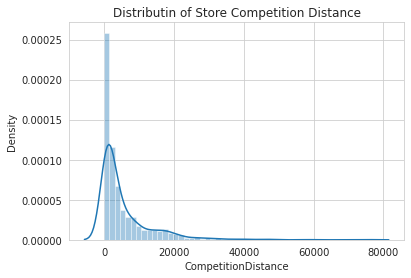

In [ ]:
# CompetitionDistance is distance in meters to the nearest competitor store
# Let's first have a look at its distribution
sns.distplot(store_df.CompetitionDistance)
plt.title("Distributin of Store Competition Distance")

Replacing the missing values with median would be a good choice

In [ ]:
# Replace missing values in CompetitionDistance with median for the store dataset
store_df.CompetitionDistance.fillna(store_df.CompetitionDistance.median(), inplace=True)


In [ ]:
# Lets merge both the files
df=pd.merge(sales_df,store_df,how='left',on='Store')
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
# Lets get year, month, date from current date

def GetYear(date):
  return date.year

def GetMonth(date):
  return date.month

def GetDay(date):
  return date.day



df['Year'] = df['Date'].apply(GetYear)
df['Month'] = df['Date'].apply(GetMonth)
df['Day'] = df['Date'].apply(GetDay)

In [ ]:
# Function to get competition age
def GetCompetitionAge(year,month,date):

  #Initiating with a variable for age
  age=0

  # Comparing the Competition open time with current time
  if date.year>year:
    age+= (date.year-year)*12 + (date.month - month)

  elif date.year == year and date.month>month:
    age+= date.month - month

  return age

In [ ]:
df['CompetitionAge'] = df.apply(lambda x: GetCompetitionAge(x.CompetitionOpenSinceYear, x.CompetitionOpenSinceMonth,x.Date), axis=1)

In [ ]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,CompetitionAge
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,82.0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,92.0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,103.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,70.0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,3.0


In [ ]:
# There are 3 types of intervals followed by different stores indicating the month in which promo2 new rounf is started
# Lets generate a binary variable showing if new promo2 round is started in the current month or not

# String to List
df['PromoInterval'] = df['PromoInterval'].str.split(',')  

# Converting months into list of month numbers for easy comparison
def GetMonthNumber(month):
  month_dict = {'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sept':9,'Oct':10,'Nov':11,'Dec':12}
  return month_dict[month]

def GetNumList(interval):
  numlist=[]
  for month in interval:
    month_num = GetMonthNumber(month)
    numlist.append(month_num)
  return numlist  

In [ ]:
print(df['PromoInterval'][1], '\n' ,
      GetNumList(df['PromoInterval'][1]))

['Jan', 'Apr', 'Jul', 'Oct'] 
 [1, 4, 7, 10]


In [ ]:
# Function to check promo2 new round

def IsPromo2NewRound(promo_part,promo_year,promo_week,promo_interval,date):

  # Initiating a variable if promo is active
  promo_active = 0
  # Initiating a variable if promo new round is active
  promo_new= 0

  # Taking only stores that are participating in promo2
  if promo_part == 1:
    # Checking if the promo has been activated
    if date.year == promo_year and date.week >= promo_week :
      promo_active = 1

    elif date.year > promo_year :
      promo_active = 1

    if promo_active == 1:
      
      #Getting month_number for easy comparison
      promo_months = GetNumList(promo_interval)
      #Checking if new round is started in current month
      if date.month in promo_months:
        promo_new = 1

  return promo_new

In [ ]:
df['Promo2New'] = df.apply( lambda x : IsPromo2NewRound(x.Promo2,x.Promo2SinceYear,x.Promo2SinceWeek,x.PromoInterval,x.Date),axis=1)
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,CompetitionAge,Promo2New
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,82.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"[Jan, Apr, Jul, Oct]",2015,7,31,92.0,1
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"[Jan, Apr, Jul, Oct]",2015,7,31,103.0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,70.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,3.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 23 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

All null values are dealt with..
One step remains before we move on to EDA

#2.3 Sanity check

In [ ]:
df.dropna(axis=1).describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,Promo2,Year,Month,Day,CompetitionAge,Promo2New
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.422021e+03,5.005638e-01,2.013832e+03,5.846762e+00,1.570279e+01,4.203993e+01,1.493892e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.706918e+03,4.999999e-01,7.773960e-01,3.326097e+00,8.787638e+00,6.534447e+01,3.564718e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,0.000000e+00,2.013000e+03,3.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.325000e+03,1.000000e+00,2.014000e+03,6.000000e+00,1.600000e+01,1.600000e+01,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,1.000000e+00,2.014000e+03,8.000000e+00,2.300000e+01,7.300000e+01,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,1.000000e+00,2.015000e+03,1.200000e+01,3.100000e+01,1.386000e+03,1.000000e+00


In [ ]:
# Stateholiday dtype is object, lets check why
df['StateHoliday'].value_counts()


0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [ ]:
# Converting all number 0 to string '0' for no holiday
df['StateHoliday'][df['StateHoliday']==0] = '0'

In [ ]:
df['StateHoliday'].value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [ ]:
# Store open/close
df[df['Open']==0][['Sales','Customers','StateHoliday','SchoolHoliday']].value_counts()

Sales  Customers  StateHoliday  SchoolHoliday
0      0          0             0                139610
                  a             0                 14465
                  b             1                  6067
                  a             1                  5101
                  c             1                  4029
                  0             1                  3067
                  b             0                   478
dtype: int64

In [ ]:
# Check entries for which Sales is zero
df[df['Sales']==0][["Open",'Customers','StateHoliday','SchoolHoliday']].value_counts()

Open  Customers  StateHoliday  SchoolHoliday
0     0          0             0                139610
                 a             0                 14465
                 b             1                  6067
                 a             1                  5101
                 c             1                  4029
                 0             1                  3067
                 b             0                   478
1     0          0             0                    40
                               1                    12
      5          0             0                     1
      3          0             0                     1
dtype: int64

1.   Store are closed even when there is no state or school holiday, this may be for refurbishment as mentioned in the problem statement
2.   Sales is zero for some entries even when store is open , this may cause bias in model so we should remove this as we dont want our model to predict zero sales for any store

In [ ]:
df.drop(df[(df['Sales']==0) & (df['Open']==1)].index,inplace=True)

In [ ]:
df.shape

(1017155, 23)

#3 Exploratory Data Analysis

In [ ]:
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day,CompetitionAge,Promo2New
count,1.017155e+06,1.017155e+06,1.017155e+06,1.017155e+06,1.017155e+06,1.017155e+06,1.017155e+06,1.017155e+06,693826.000000,693826.000000,1.017155e+06,509139.000000,509139.000000,1.017155e+06,1.017155e+06,1.017155e+06,1.017155e+06,1.017155e+06
mean,5.584284e+02,3.998356e+00,5.774126e+03,6.331796e+02,8.300977e-01,3.815141e-01,1.786444e-01,5.422165e+03,7.222835,2008.690232,5.005520e-01,23.269714,2011.752700,2.013832e+03,5.846792e+00,1.570280e+01,4.204004e+01,1.493853e-01
std,3.219078e+02,1.997420e+00,3.849799e+03,4.644012e+02,3.755472e-01,4.857585e-01,3.830544e-01,7.707027e+03,3.211810,5.992658,4.999999e-01,14.096037,1.662857,7.774051e-01,3.326120e+00,8.787591e+00,6.534467e+01,3.564680e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000,2.013000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.728000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000,2.013000e+03,3.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.325000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000,2.014000e+03,6.000000e+00,1.600000e+01,1.600000e+01,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000,2.014000e+03,8.000000e+00,2.300000e+01,7.300000e+01,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000,2.015000e+03,1.200000e+01,3.100000e+01,1.386000e+03,1.000000e+00


In [ ]:
#DF only for when store is open
df_open = df[df['Open']==1]
df_open.drop(columns=["Open"],inplace=True)

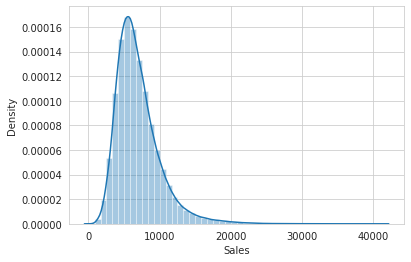

In [ ]:
# Lets look at our dependant variable
sns.distplot(df_open['Sales'])

There is positive skewness, so we should use transformation before training our model

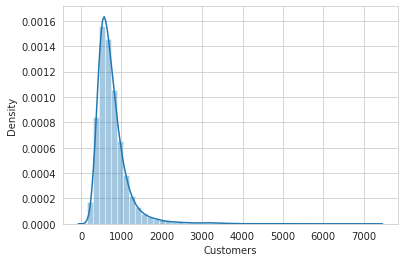

In [ ]:
# Customers
sns.distplot(df_open['Customers'])

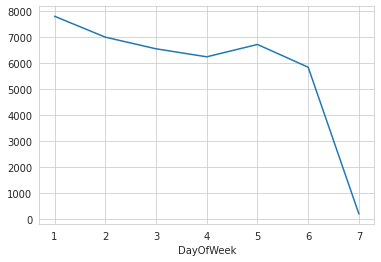

In [ ]:
# Week-days-wise average sales
df.groupby('DayOfWeek')['Sales'].mean().plot()

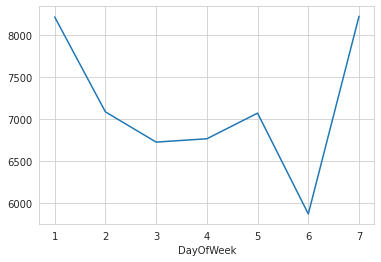

In [ ]:
# Week-days-wise average sales only when store is open
df_open.groupby('DayOfWeek')['Sales'].mean().plot()

As it is evident from the entries day 1 is Monday.

While stores are mostly closed on sundays, sales is highest when open.

Apart from sunday, sale is maximum on Mondays

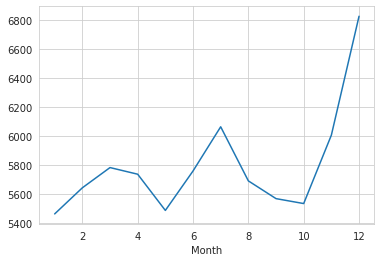

In [ ]:
# Monthly Average Sales
# As we dont have data for 2015 whole year, sum of sales wont be the correct statistic, lets take average. 
df.groupby('Month')['Sales'].mean().plot()

Towards year ending sales are better on an average 

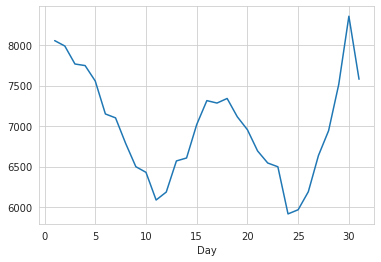

In [ ]:
# Date of the month vs Sales
df_open.groupby('Day')['Sales'].mean().plot()

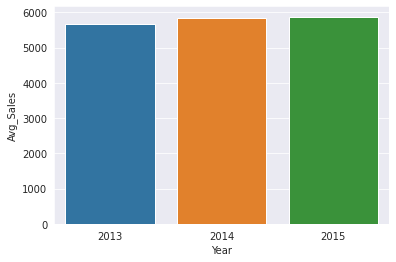

In [ ]:
# Year vs sales(average)
temp_df = df.groupby([df.Year])['Sales'].mean().reset_index()
temp_df.rename(columns={'Sales':'Avg_Sales'},inplace=True)
x=temp_df['Year']
y=temp_df['Avg_Sales']
sns.set_style("darkgrid")
sns.barplot(x=x,y=y)
plt.show()

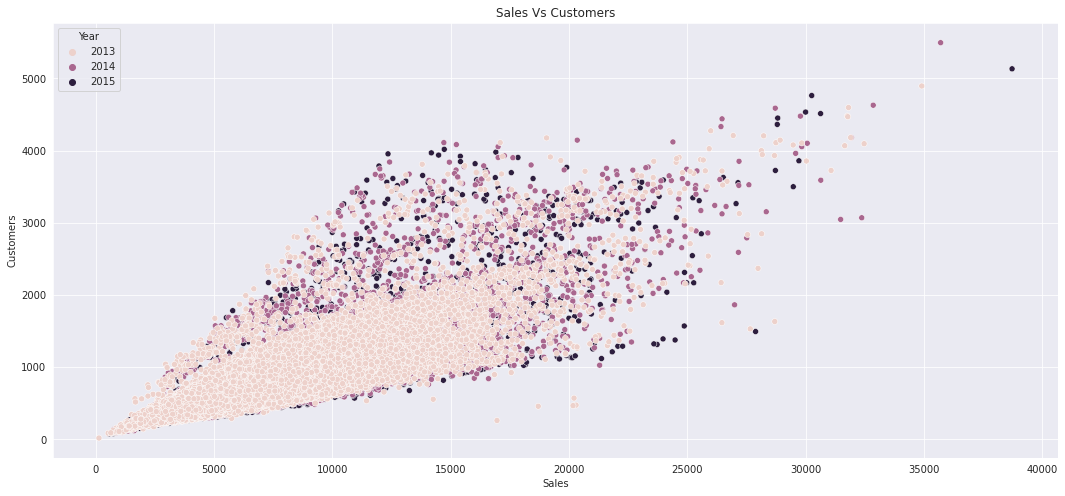

In [ ]:
# Sales vs customers
plt.figure(figsize=(18,8))
temp_df = df_open.sample(100000)
sns.scatterplot(temp_df.Sales, temp_df.Customers, hue=df.Year)
plt.title("Sales Vs Customers")
plt.show()

In [ ]:
store_df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

Text(0.5, 1.0, 'Number of stores running promo')

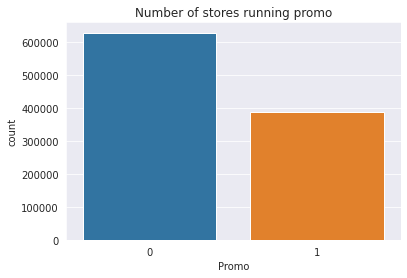

In [ ]:
# Number of stores running promo
sns.countplot(x=sales_df['Promo']).set_title('Number of stores running promo')

Stores are not running promo for majority of days

[Text(0.5, 1.0, 'Sales vs Promo')]

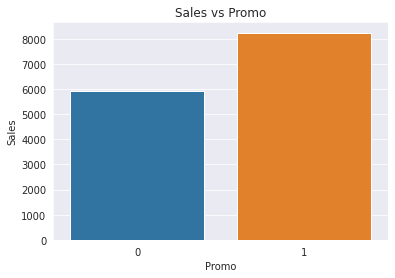

In [ ]:
# Lets see how promo is impacting sales
sns.barplot(x='Promo',y='Sales',data=df_open).set(title='Sales vs Promo')

It is evident that promo is effective

Text(0.5, 1.0, 'Number of stores running promo2')

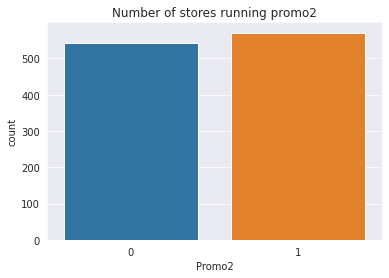

In [ ]:
# Number of stores participating in promo2
sns.countplot(x=store_df['Promo2']).set_title('Number of stores running promo2')

More than 50% of stores are participating in Promo2

[Text(0.5, 1.0, 'Sales vs Promo2new')]

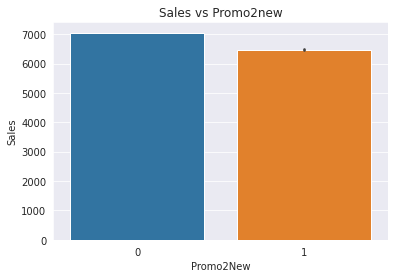

In [ ]:
# Effect on sales when new promo2 is started 
sns.barplot(x='Promo2New',y='Sales',data=df_open).set(title='Sales vs Promo2new')

Promo 2 is ineffective

In [ ]:
# Lets look at the storetype
store_df["StoreType"].value_counts()

a    602
d    348
c    148
b     17
Name: StoreType, dtype: int64

So, majority of stores are of 'a' type , followed by d and c while b type are the least 

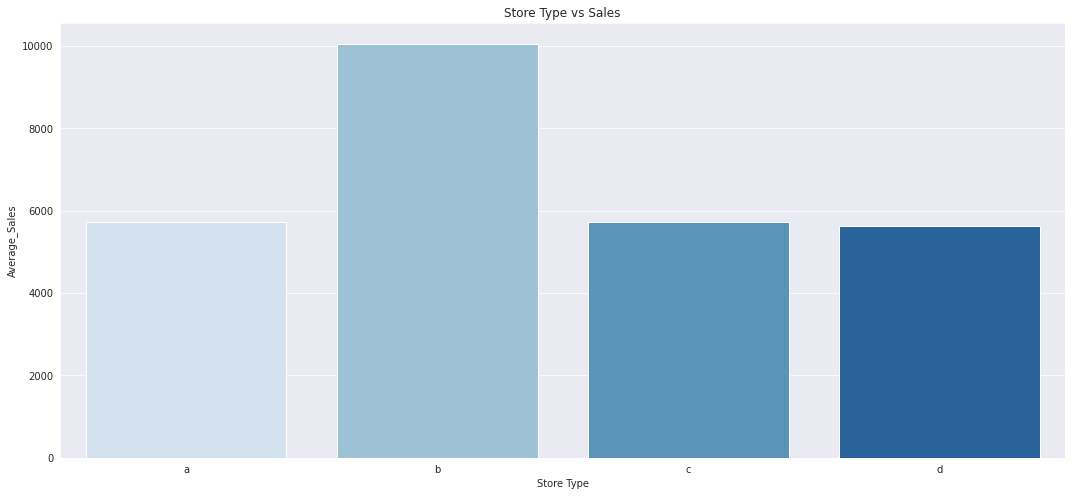

In [ ]:
# Store type
plt.figure(figsize=(18,8))
temp_df = df.groupby(df.StoreType).mean()
sns.barplot(temp_df.index, temp_df.Sales, palette='Blues')
plt.title("Store Type vs Sales")
plt.xlabel('Store Type')
plt.ylabel('Average_Sales')
plt.show()

Store b are the least in numbers but on an average outperforms other store types
Lets check if the reason is promo or competition

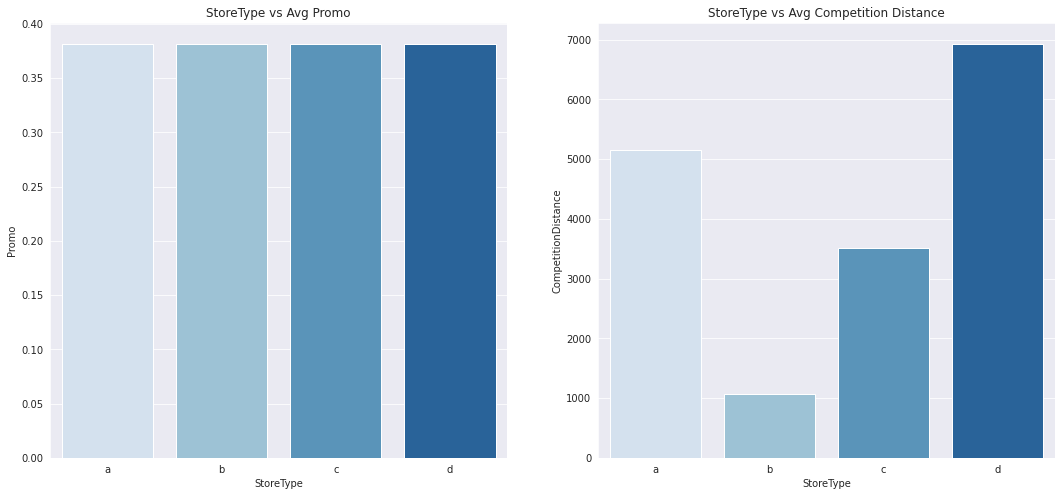

In [ ]:
# Store type and competition
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
temp_df = df.groupby(df.StoreType).mean()
sns.barplot(temp_df.index, temp_df['Promo'], ax=ax1, palette='Blues').set(title='StoreType vs Avg Promo')
temp_df = df.groupby(df.StoreType).mean()
sns.barplot(temp_df.index, temp_df['CompetitionDistance'], ax=ax2, palette='Blues').set(title='StoreType vs Avg Competition Distance')
plt.show()

Store type b has the least competition , meaning distance from the nearest competition is the lowest on an average for store type b which lead to higher sales on an average.



In [ ]:
# Assortment level of stores
store_df['Assortment'].value_counts()

a    593
c    513
b      9
Name: Assortment, dtype: int64

[Text(0.5, 1.0, 'Avg Sales vs Assortment Level')]

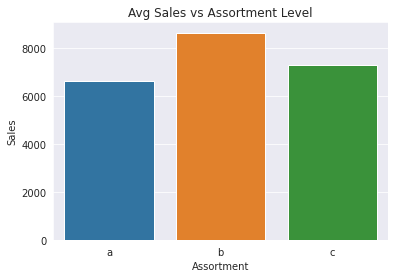

In [ ]:
# Sales vs Assortment Type
temp_df=pd.DataFrame(df_open.groupby('Assortment')['Sales'].mean())
sns.barplot(temp_df.index, temp_df.Sales).set(title='Avg Sales vs Assortment Level')
#temp_df

Assortement level indicates a = basic, b = extra, c = extended
So, extra level has highest average sales

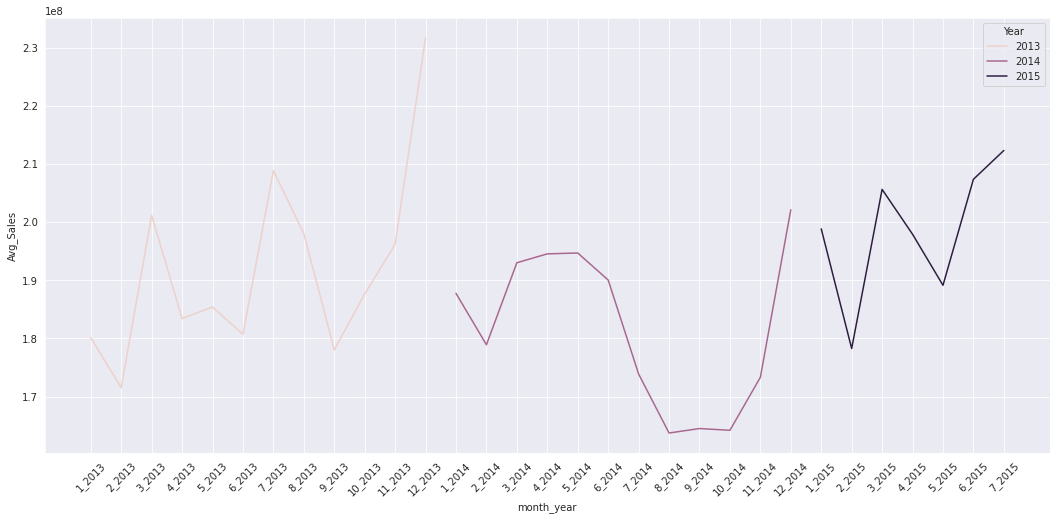

In [ ]:
# Sales trend
temp_df = df_open.groupby([(df.Year),(df.Month)])['Sales'].sum().reset_index()
temp_df.rename(columns={'Sales':'Avg_Sales'},inplace=True)
temp_df['month_year'] = temp_df['Month'].astype(str) + '_' + temp_df['Year'].astype(str)

plt.figure(figsize=(18,8))
x=temp_df['month_year']
y=temp_df['Avg_Sales']
sns.lineplot(x=x,y=y,hue=temp_df['Year'])
plt.xticks(rotation=45)
plt.show()
#temp_df

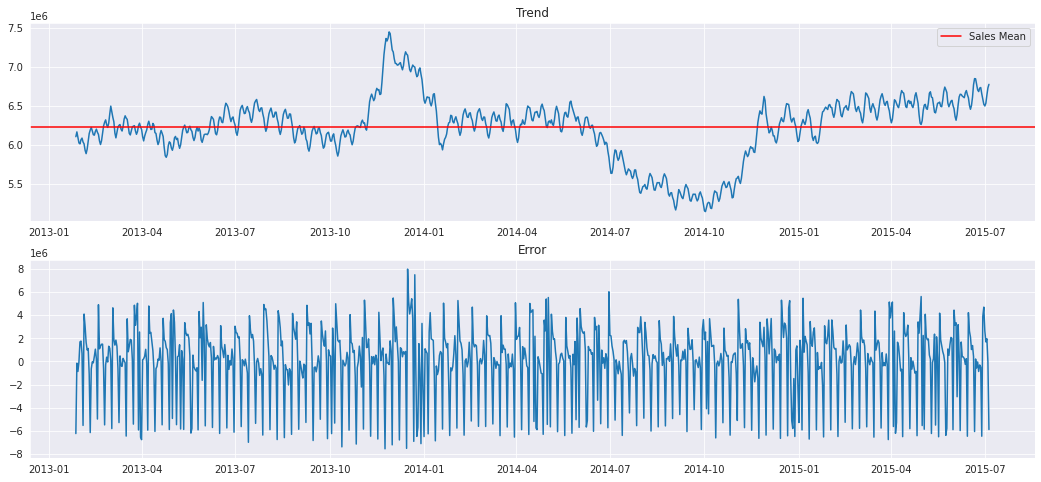

In [ ]:
# Lets look at the trend and seasonal part
from statsmodels.tsa.seasonal import seasonal_decompose
temp_df = df_open.copy()
temp_df.Date = pd.to_datetime(temp_df.Date)
temp_df.index = temp_df.Date
temp_df.Sales = temp_df.Sales.apply(lambda x: None if x == 0 else x)
temp_df.Sales = temp_df.Sales.fillna(method='ffill').fillna(method='bfill')
temp_df = temp_df[['Sales']]
temp_df = temp_df.groupby(temp_df.index).sum()
result = seasonal_decompose(temp_df, model='additive', freq=52)

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(18,8))
ax1.plot(result.trend)
ax1.axhline(y = temp_df.Sales.mean(), color = 'r', linestyle = '-', label='Sales Mean')
ax1.set_title("Trend")
ax2.plot(result.resid)
ax2.set_title("Error")
ax1.legend()
plt.show()

2015 seems to be a good year as the trend line is above the average trend line.

There is a increase in sales at year-ending as compared to previous months.

There is a dip in year 2014 from July-Oct

I wonder what drived that?

In [ ]:
# First lets check the number of stores open 
temp_df = pd.DataFrame()
temp_df['2013']= df[df['Year']==2013].groupby('Month')["Open"].sum()
temp_df['2014']= df[df['Year']==2014].groupby('Month')["Open"].sum()
temp_df['2015']= df[df['Year']==2015].groupby('Month')["Open"].sum()
temp_df

,2013,2014,2015
Month,,,
1,28865,28707,28763.0
2,26682,26791,26766.0
3,27891,29005,29079.0
4,27878,26917,26931.0
5,26199,28021,25879.0
6,27939,26209,28423.0
7,30164,25224,30188.0
8,30023,24388,NaN
9,27980,24341,NaN


Many of the stores where closed in 2nd half of 2014 that lead to dip in sales

Stores may be closed for refurbishment 

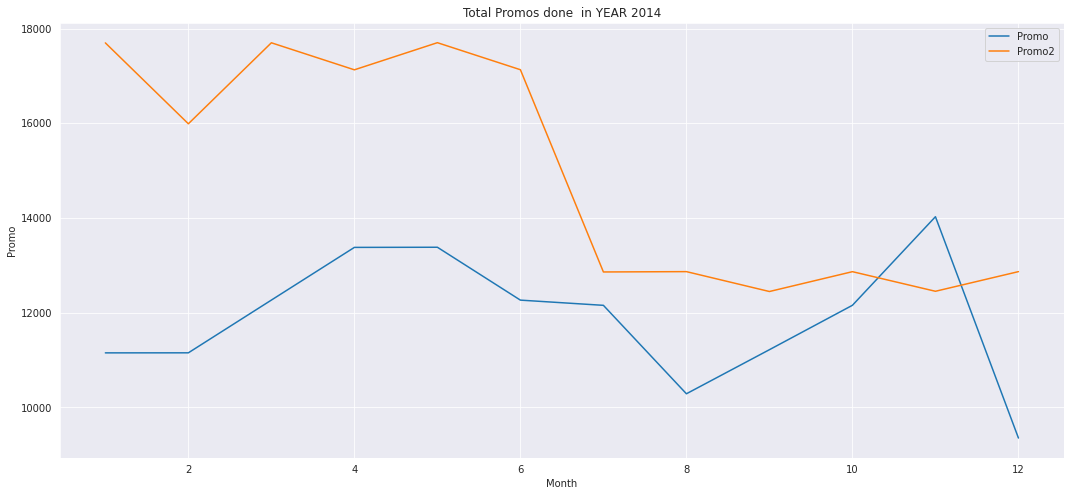

In [ ]:
# Promos done in year 2014
plt.figure(figsize=(18,8))
temp_df = df.copy()
temp_df.index = temp_df.Date
temp_df= temp_df[temp_df.Year==2014]
temp_df = temp_df.groupby(temp_df.Month).sum()


plt.title('Total Promos done  in YEAR 2014')
sns.lineplot(temp_df.index, temp_df.Promo,palette='Blues',label='Promo')
sns.lineplot(temp_df.index, temp_df.Promo2, palette='Blues', label='Promo2')
plt.legend()
plt.show()
#temp_df.head()

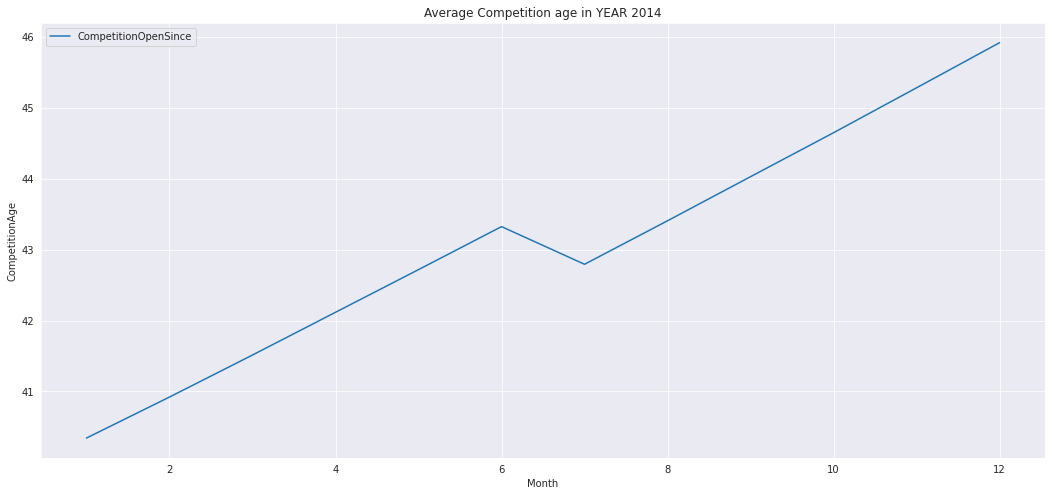

In [ ]:
# Lets check if there is any entry of new competition
plt.figure(figsize=(18,8))
temp_df = df.copy()
temp_df.index = temp_df.Date
temp_df= temp_df[temp_df.Year==2014]
temp_df = temp_df.groupby(temp_df.Month).mean()


plt.title('Average Competition age in YEAR 2014')
sns.lineplot(temp_df.index, temp_df.CompetitionAge,palette='Blues',label='CompetitionOpenSince')
plt.legend()
plt.show()

Stores have decreased promo participation after june 2014 and also there is new entry in competition which may also have factored in the dip in sales

[Text(0.5, 1.0, 'Avg Sales vs StateHoliday')]

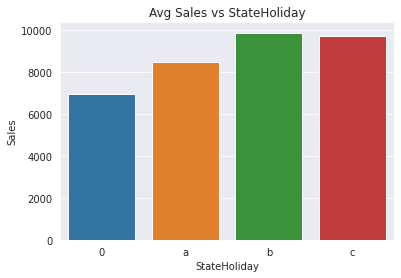

In [ ]:
# Stateholiday vs Sales
temp_df=pd.DataFrame(df_open.groupby('StateHoliday')['Sales'].mean())
sns.barplot(temp_df.index, temp_df.Sales).set(title='Avg Sales vs StateHoliday')
#temp_df

Ss we already know that a = public holiday, b = Easter holiday, c = Christmas  so sales are maximum on Easter holiday on an average followed by Christmas while on a regular day sales are low ( on average)

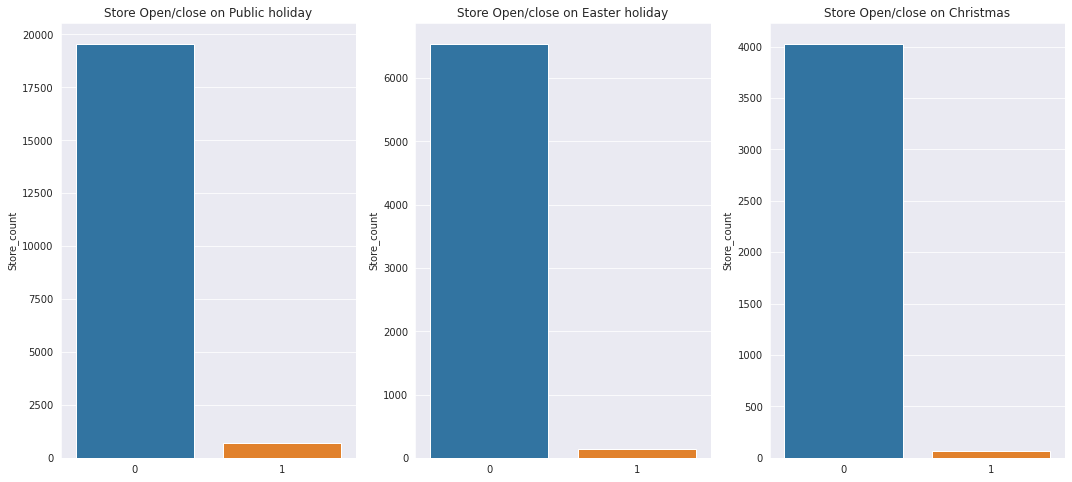

In [ ]:
# Lets check for all 3 holidays, stores are open/close
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18,8))
temp_df = pd.DataFrame(df[df['StateHoliday']=='a']["Open"].value_counts()).rename(columns={'Open':'Store_count'})
sns.barplot(temp_df.index,temp_df.Store_count,ax=ax1).set(title='Store Open/close on Public holiday')
temp_df = pd.DataFrame(df[df['StateHoliday']=='b']["Open"].value_counts()).rename(columns={'Open':'Store_count'})
sns.barplot(temp_df.index,temp_df.Store_count,ax=ax2).set(title='Store Open/close on Easter holiday')
temp_df = pd.DataFrame(df[df['StateHoliday']=='c']["Open"].value_counts()).rename(columns={'Open':'Store_count'})
sns.barplot(temp_df.index,temp_df.Store_count,ax=ax3).set(title='Store Open/close on Christmas')
plt.show()

We can see that stores are mostly closed on all state holidays

[Text(0.5, 1.0, 'School Holiday vs Sales')]

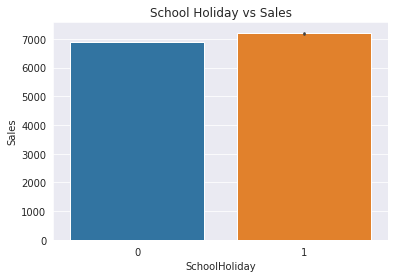

In [ ]:
# Sales vs School Holiday
sns.barplot(x='SchoolHoliday', y='Sales', data=df_open).set(title='School Holiday vs Sales')

Sales are higher on school holidays

[Text(0.5, 1.0, 'Store Open/close on SchoolHoliday')]

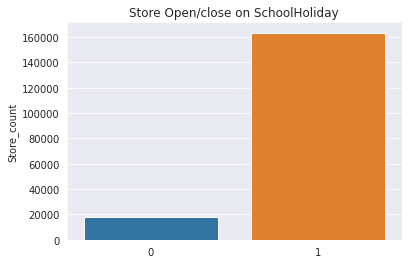

In [ ]:
# Store open/close on Schoolholiday
temp_df = pd.DataFrame(df[df['SchoolHoliday']==1]["Open"].value_counts()).rename(columns={'Open':'Store_count'})
#temp_df
sns.barplot(temp_df.index,temp_df.Store_count).set(title='Store Open/close on SchoolHoliday')

We can say that stores mostly remain open on school holidays.

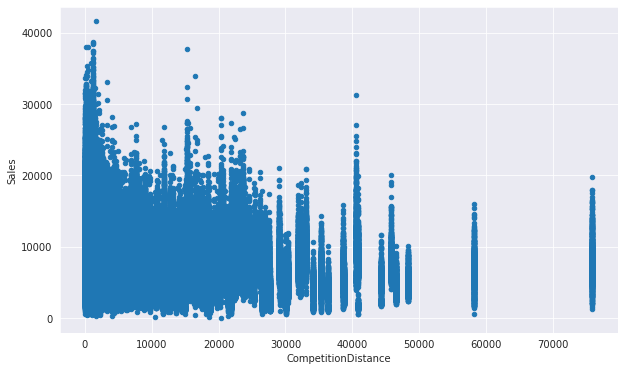

In [ ]:
# Competetion distance
df_open.plot(x='CompetitionDistance',y='Sales',kind='scatter',figsize =(10,6))

Rossman stores are performing well even when competition distance is low.

#4 Feature Engineering

In [ ]:
# Making a copy of df
df1 = df.copy()

In [ ]:
# One hot encoding for categorical features
df1=pd.concat([df1,pd.get_dummies(df1['StateHoliday'],prefix='holy')],axis=1).drop(['StateHoliday'],axis=1)
# For stateholiday, we only need dummies for 3 holidays( public,easter & christmas ), so we can remove the holiday 0 dummy as in for no holiday
#df1.drop(columns=['holy_0'],inplace=True)
df1=pd.concat([df1,pd.get_dummies(df1['StoreType'],prefix='type')],axis=1).drop(['StoreType'],axis=1)
df1=pd.concat([df1,pd.get_dummies(df1['Assortment'],prefix='assort')],axis=1).drop(['Assortment'],axis=1)
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,CompetitionAge,Promo2New,holy_0,holy_a,holy_b,holy_c,type_a,type_b,type_c,type_d,assort_a,assort_b,assort_c
0,1,5,2015-07-31,5263,555,1,1,1,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,82.0,0,1,0,0,0,0,0,1,0,1,0,0
1,2,5,2015-07-31,6064,625,1,1,1,570.0,11.0,2007.0,1,13.0,2010.0,"[Jan, Apr, Jul, Oct]",2015,7,31,92.0,1,1,0,0,0,1,0,0,0,1,0,0
2,3,5,2015-07-31,8314,821,1,1,1,14130.0,12.0,2006.0,1,14.0,2011.0,"[Jan, Apr, Jul, Oct]",2015,7,31,103.0,1,1,0,0,0,1,0,0,0,1,0,0
3,4,5,2015-07-31,13995,1498,1,1,1,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,70.0,0,1,0,0,0,0,0,1,0,0,0,1
4,5,5,2015-07-31,4822,559,1,1,1,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,3.0,0,1,0,0,0,1,0,0,0,1,0,0


In [ ]:
df1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day',
       'CompetitionAge', 'Promo2New', 'holy_0', 'holy_a', 'holy_b', 'holy_c',
       'type_a', 'type_b', 'type_c', 'type_d', 'assort_a', 'assort_b',
       'assort_c'],
      dtype='object')

In [ ]:
# Number of Customers will not be available for predictions, so we cannot use it directly in our model.
# Customers change according to week-day, date of the month ,month of the year, so lets use average of customers in the past as a feature for future predictions
# Calculating monthly, weekly and date-wise average of customers in the past(excluding last 6 weeks as we will use that in test set)
last_date = df1['Date'].max() - datetime.timedelta(42) 
past_df = df1[df1['Date']<=last_date]

monthly_avg_cust_df = past_df.groupby('Month')['Customers'].mean()
weekday_avg_cust_df = past_df.groupby('DayOfWeek')['Customers'].mean()
date_avg_cust_df = past_df.groupby('Day')['Customers'].mean()

def GetMonthlyAvg(month) :
  return round(monthly_avg_cust_df[month]) 

def GetWeekdayAvg(weekday) :
  return round(weekday_avg_cust_df[weekday]) 

def GetDateAvg(day) :
  return round(date_avg_cust_df[day])  

df1['MonthlyAvgCust'] = df1['Month'].apply(GetMonthlyAvg)  
df1['WeekdayAvgCust'] = df1['DayOfWeek'].apply(GetWeekdayAvg) 
df1['DateAvgCust'] = df1['Day'].apply(GetDateAvg)    

In [ ]:
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,CompetitionAge,Promo2New,holy_0,holy_a,holy_b,holy_c,type_a,type_b,type_c,type_d,assort_a,assort_b,assort_c,MonthlyAvgCust,WeekdayAvgCust,DateAvgCust
0,1,5,2015-07-31,5263,555,1,1,1,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,82.0,0,1,0,0,0,0,0,1,0,1,0,0,664,743,634
1,2,5,2015-07-31,6064,625,1,1,1,570.0,11.0,2007.0,1,13.0,2010.0,"[Jan, Apr, Jul, Oct]",2015,7,31,92.0,1,1,0,0,0,1,0,0,0,1,0,0,664,743,634
2,3,5,2015-07-31,8314,821,1,1,1,14130.0,12.0,2006.0,1,14.0,2011.0,"[Jan, Apr, Jul, Oct]",2015,7,31,103.0,1,1,0,0,0,1,0,0,0,1,0,0,664,743,634
3,4,5,2015-07-31,13995,1498,1,1,1,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,70.0,0,1,0,0,0,0,0,1,0,0,0,1,664,743,634
4,5,5,2015-07-31,4822,559,1,1,1,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,3.0,0,1,0,0,0,1,0,0,0,1,0,0,664,743,634


In [ ]:
# Removing all features that are not useful any more
df1.drop(columns =['Customers','CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'], inplace=True) 

In [ ]:
corr=df1.drop(columns=["Date"]).corr()
corr['Sales']

Store                  0.005133
DayOfWeek             -0.462170
Sales                  1.000000
Open                   0.678553
Promo                  0.452385
SchoolHoliday          0.085141
CompetitionDistance   -0.018899
Promo2                -0.091012
Year                   0.023508
Month                  0.048758
Day                   -0.011615
CompetitionAge        -0.004119
Promo2New             -0.043114
holy_0                 0.254245
holy_a                -0.203052
holy_b                -0.117510
holy_c                -0.092628
type_a                -0.010060
type_b                 0.139987
type_c                -0.005128
type_d                -0.022889
assort_a              -0.080484
assort_b               0.065531
assort_c               0.068754
MonthlyAvgCust         0.079253
WeekdayAvgCust         0.606187
DateAvgCust            0.144699
Name: Sales, dtype: float64

Text(0.5, 1.0, 'Correlation Heatmap')

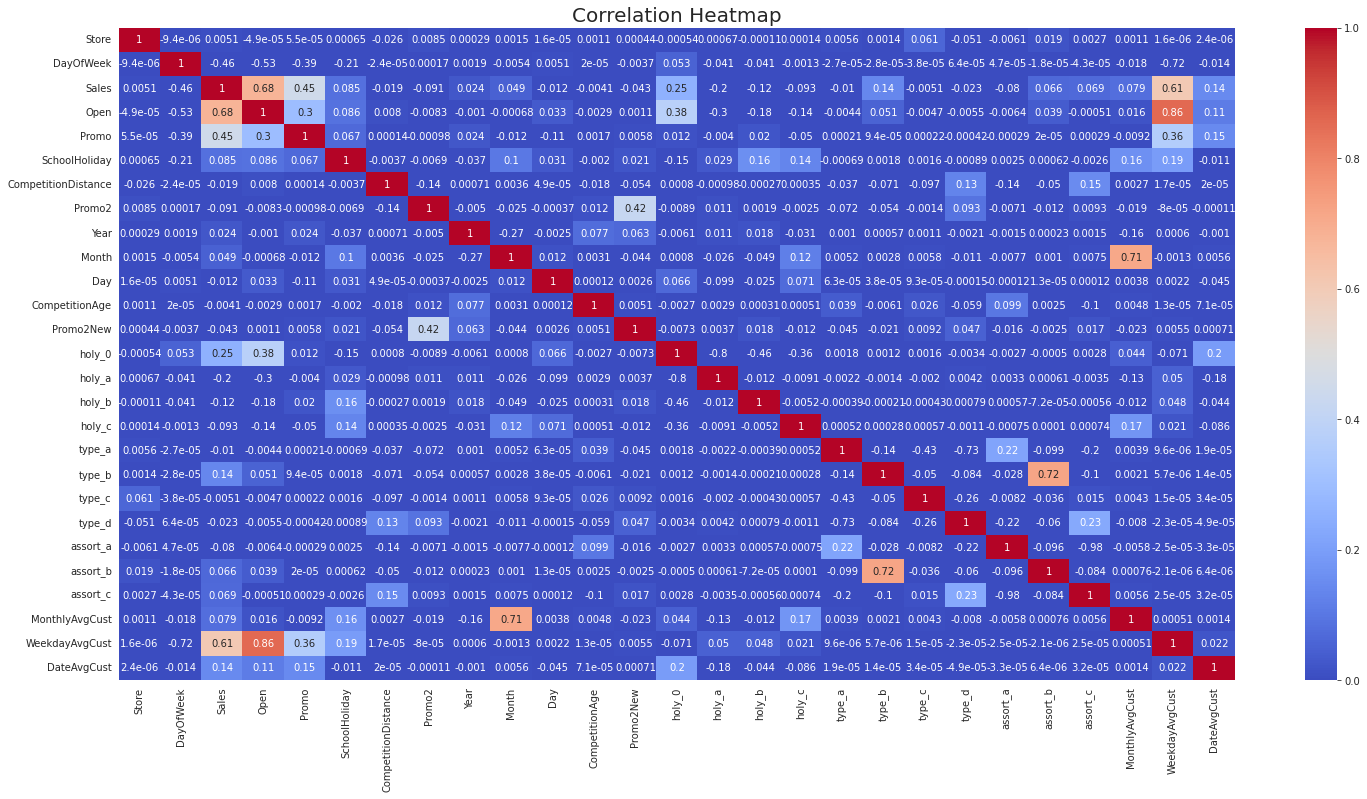

In [ ]:
# Heatmap
f,ax = plt.subplots(figsize = (25,12))
sns.heatmap(corr,vmin=0,annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap", fontsize=20)

From the heatmap, we can breifly comment that important features apart from 'Open' are WeekDayAvgCust, Promo,holy_0(no holiday), DateAvgCust, type_b(store_type),assortment c

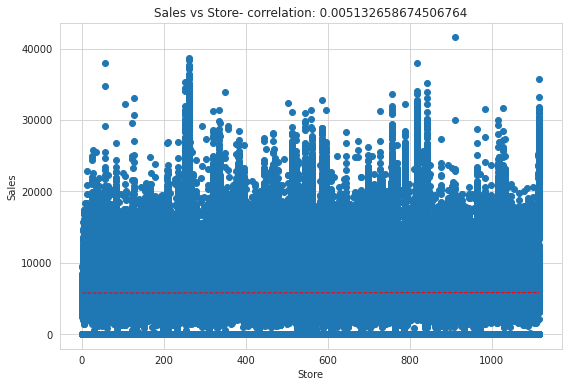

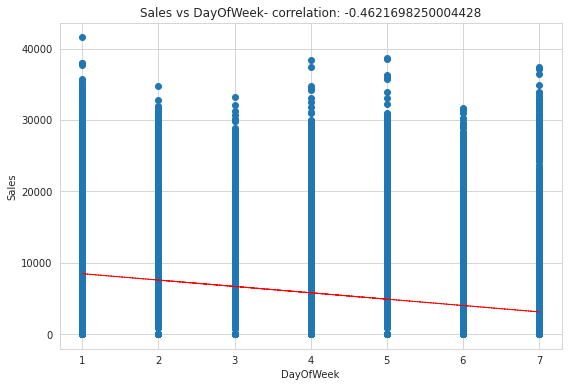

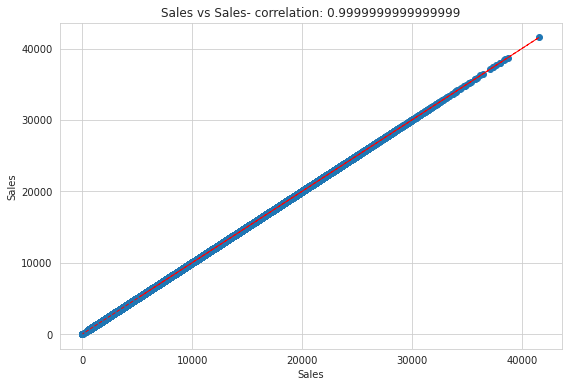

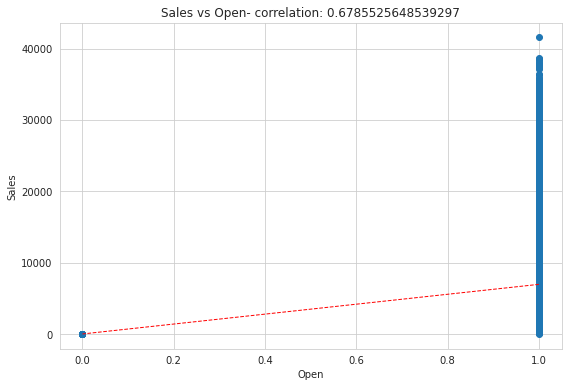

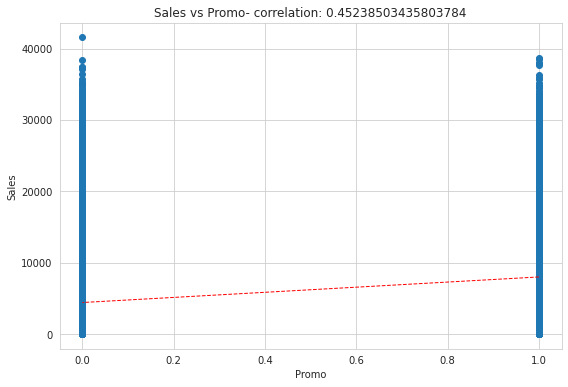

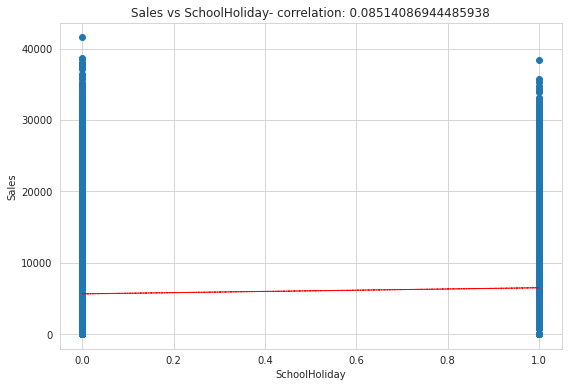

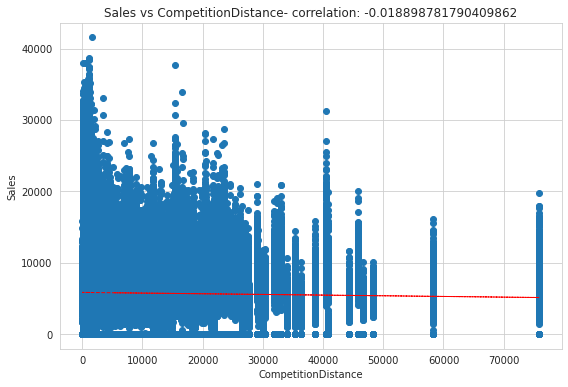

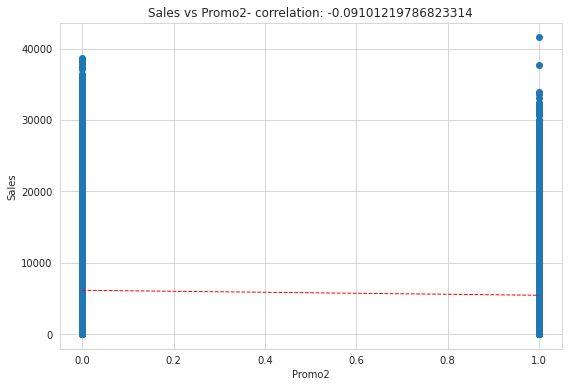

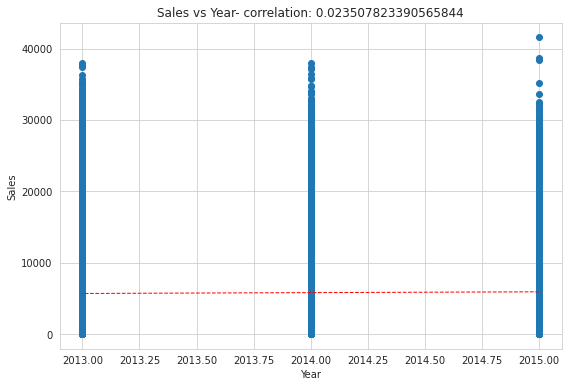

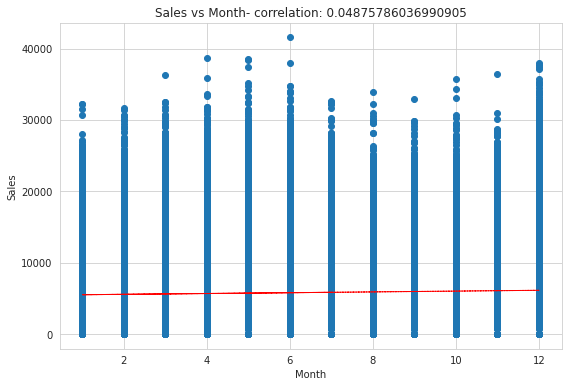

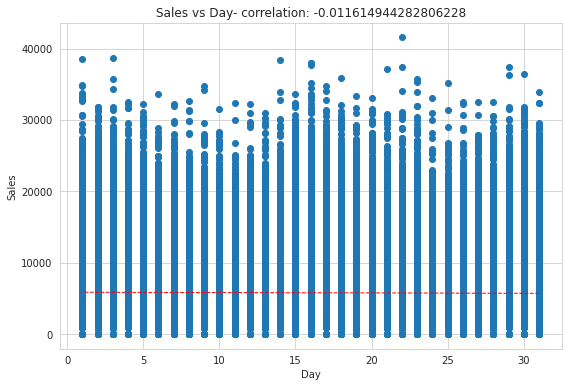

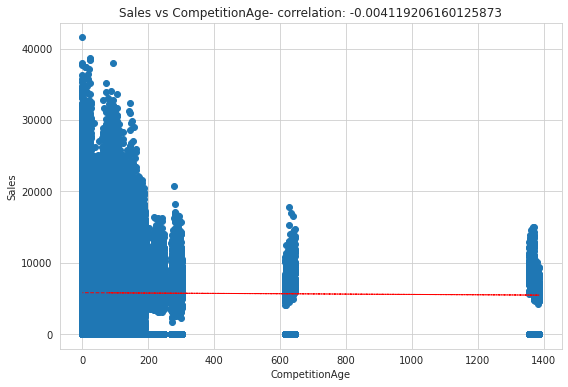

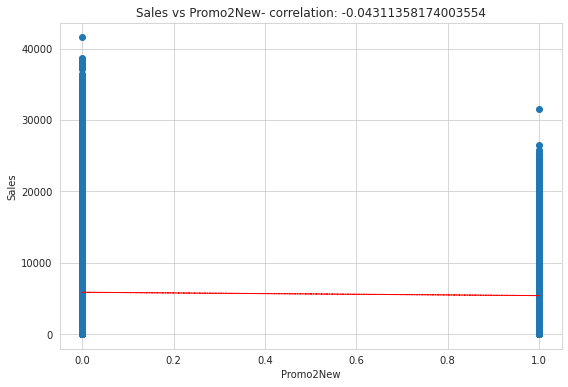

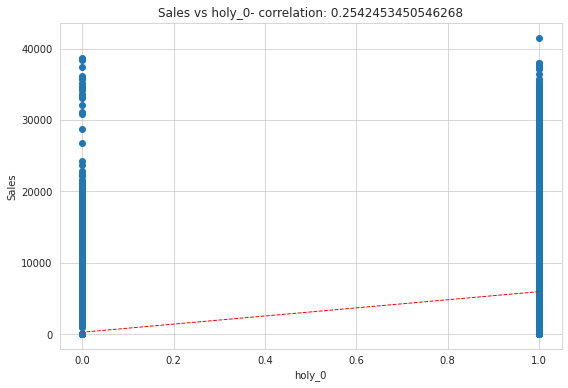

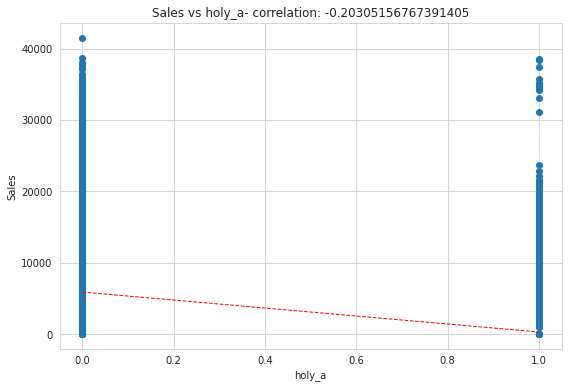

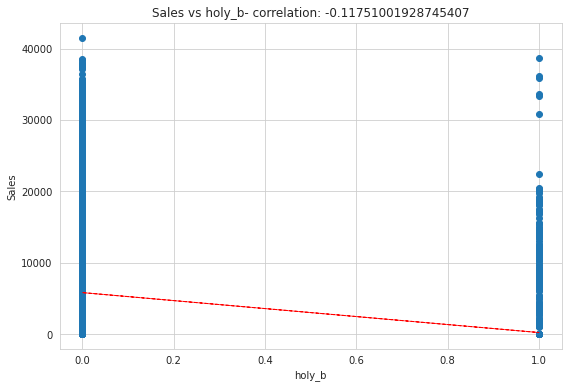

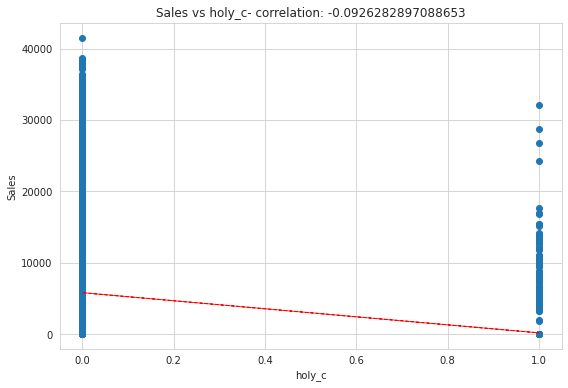

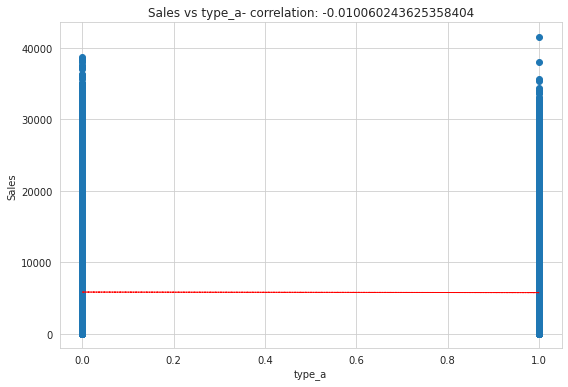

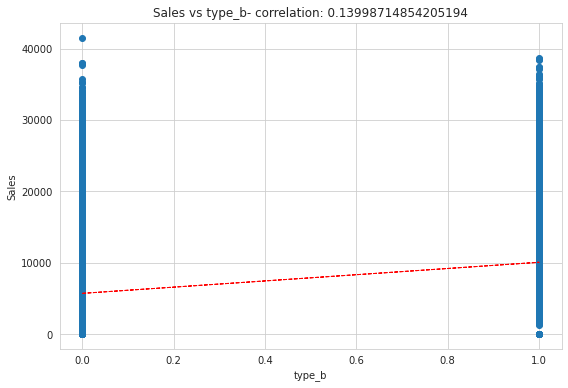

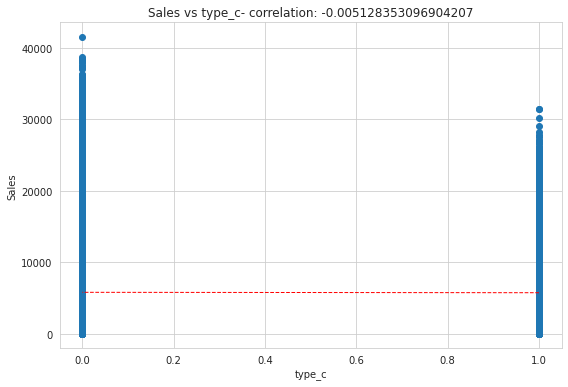

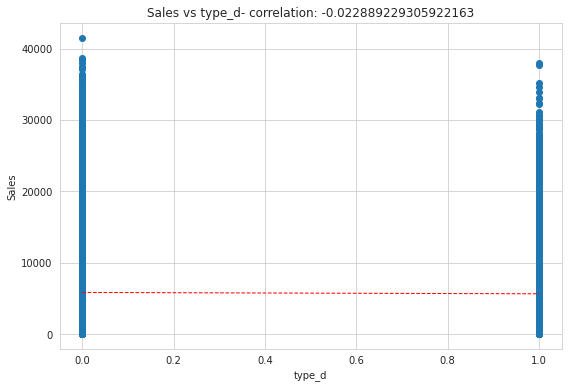

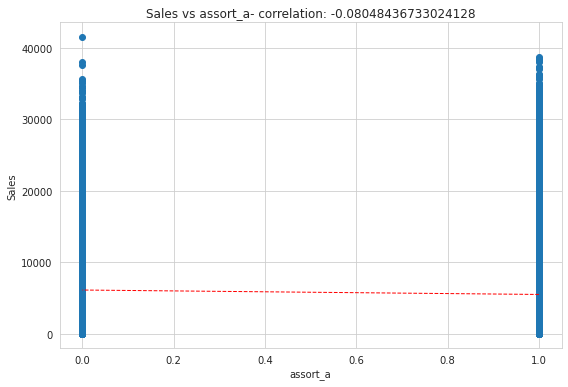

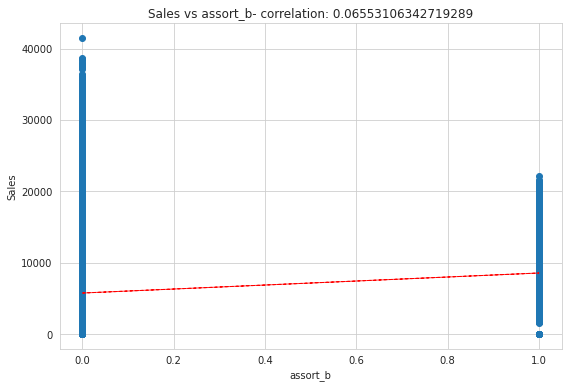

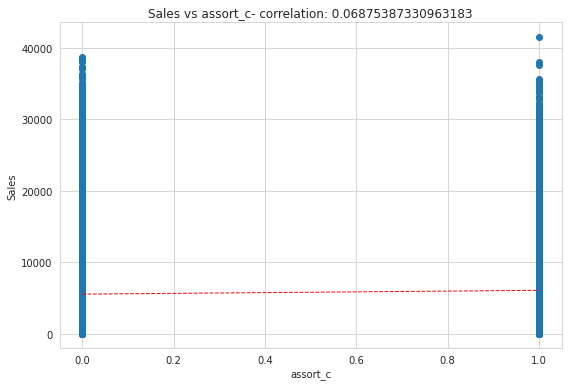

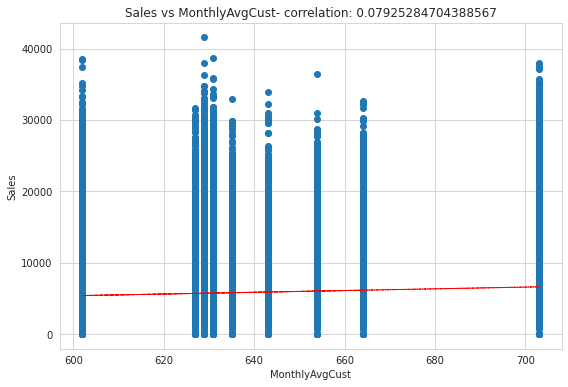

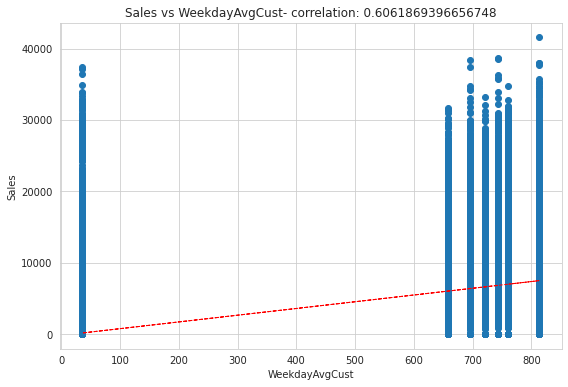

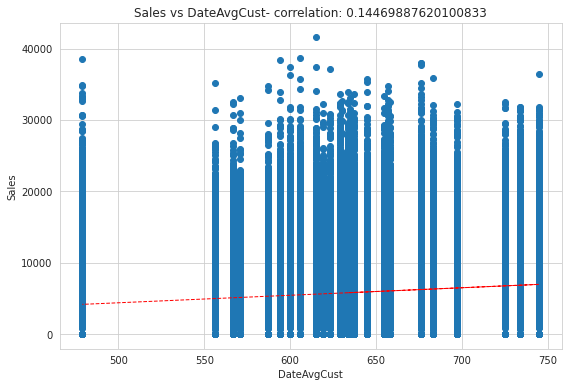

In [ ]:
# Correlation
for col in df1.drop(columns=['Date']):
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df1[col]
    label = df1['Sales']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Sales')
    ax.set_title('Sales vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df1[col], df1['Sales'], 1)
    y_hat = np.poly1d(z)(df1[col])

    plt.plot(df1[col], y_hat, "r--", lw=1)

plt.show()

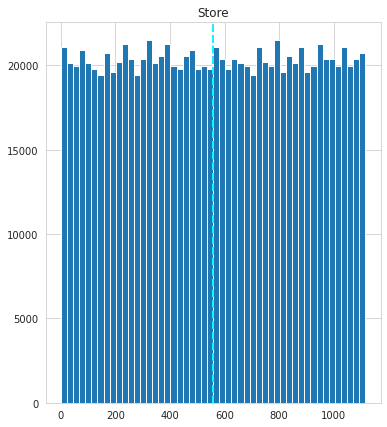

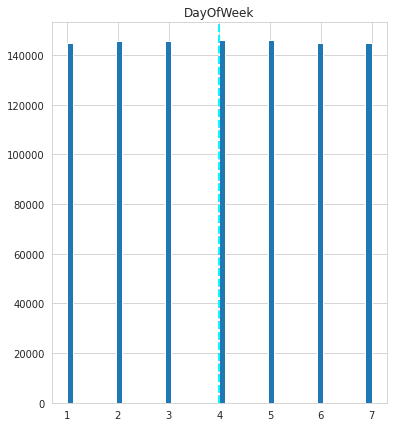

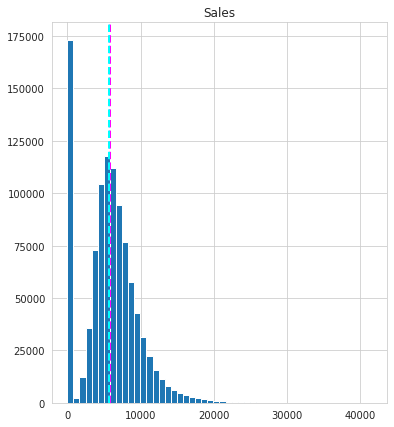

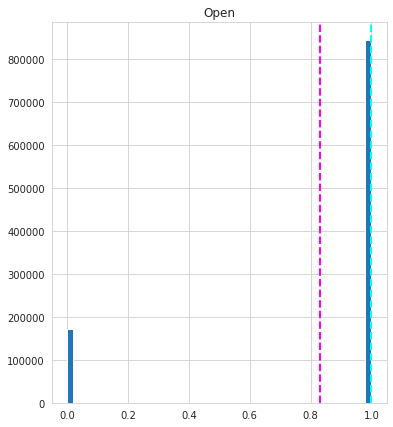

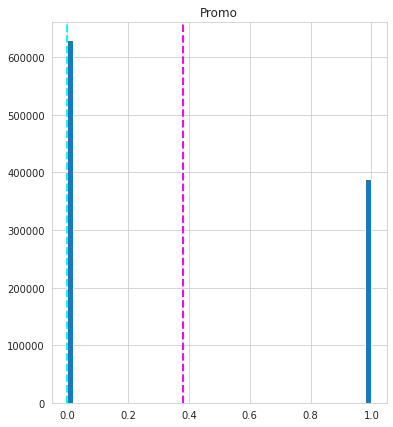

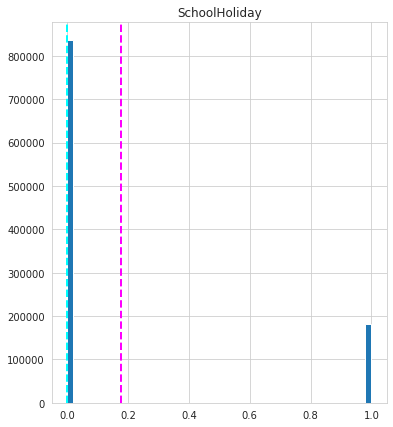

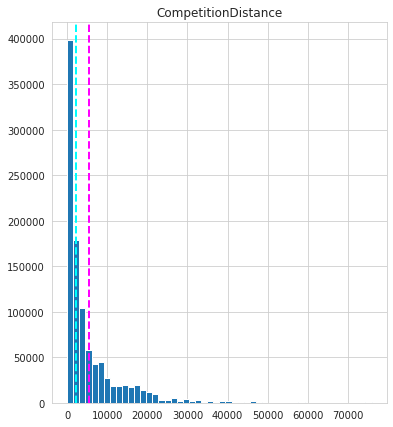

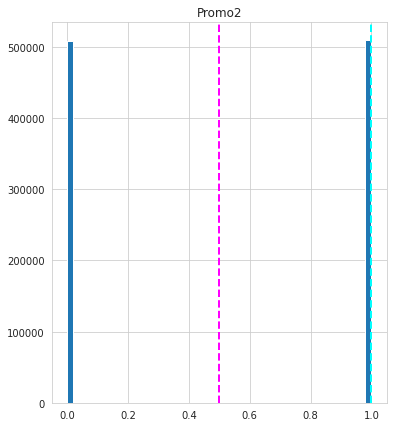

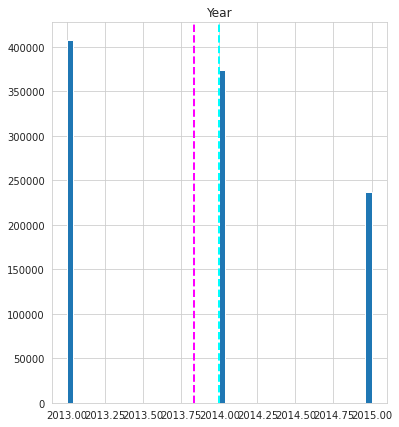

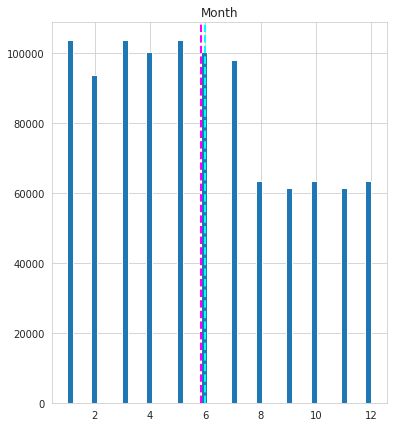

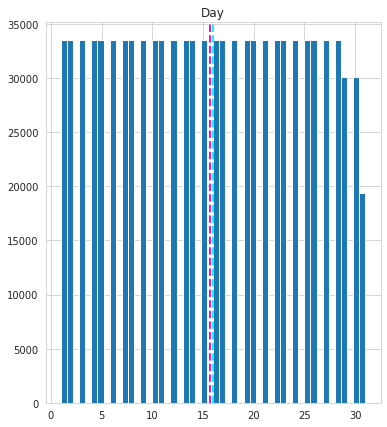

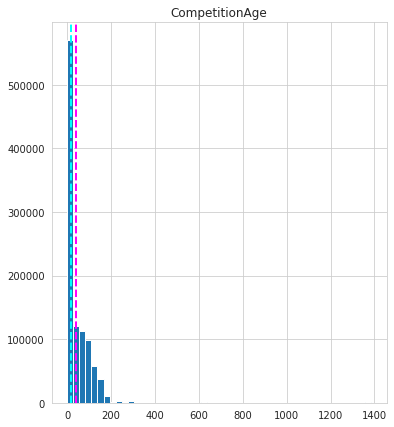

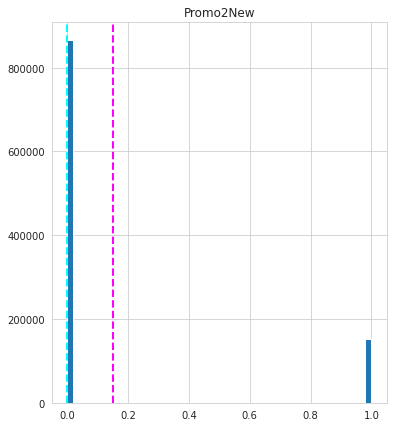

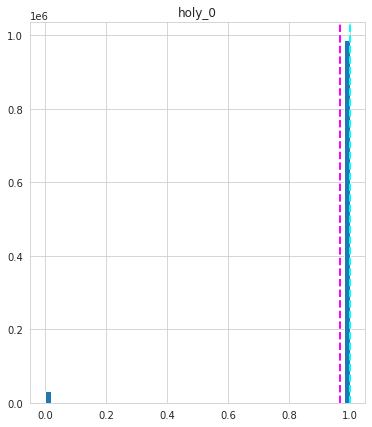

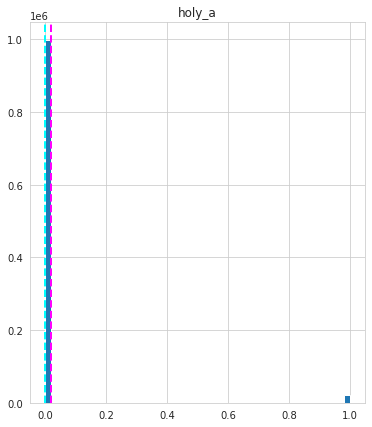

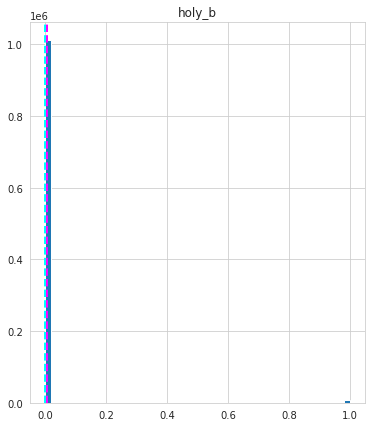

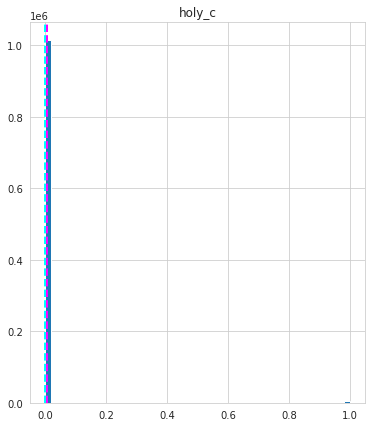

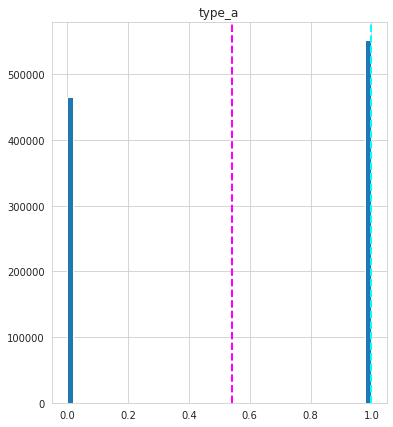

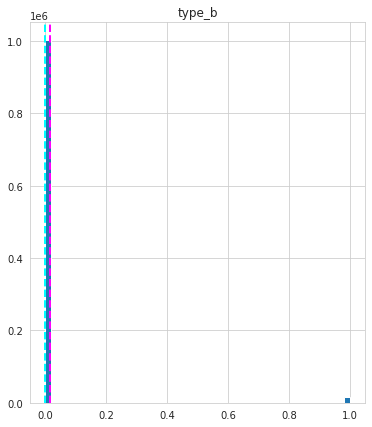

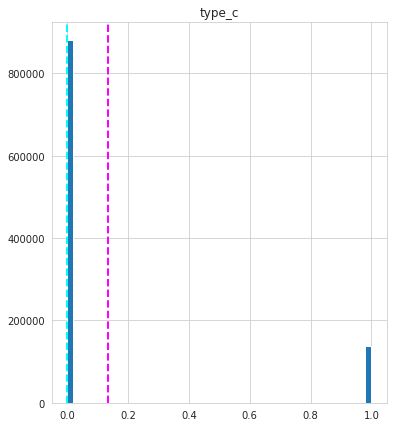

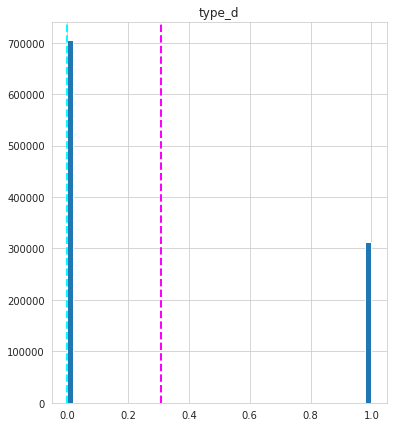

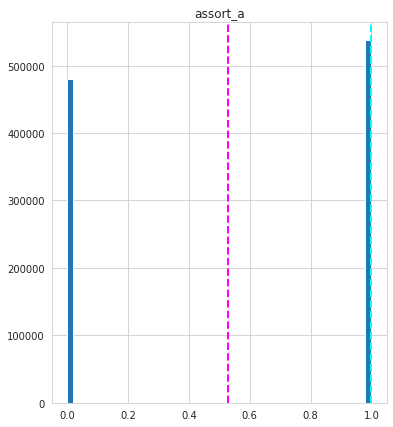

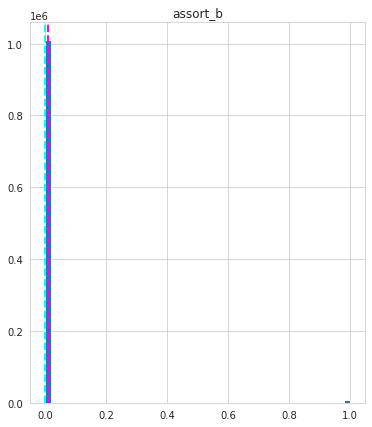

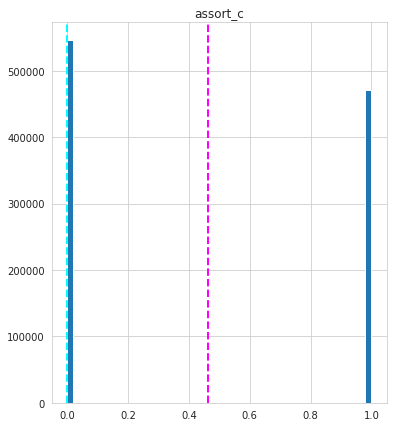

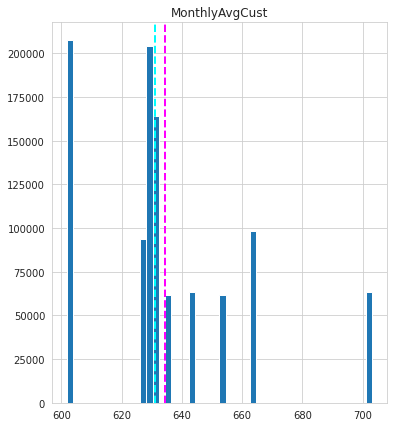

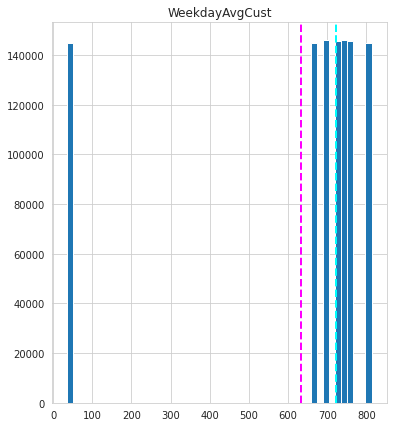

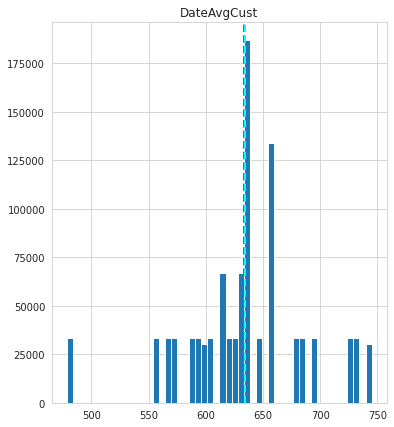

In [ ]:
# Distribustion
for col in df1.drop(columns=['Date']):
  figure=plt.figure(figsize=(6,7))
  ax=figure.gca()
  feature = df1[col]
  feature.hist(bins=50, ax = ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
  ax.set_title(col)
plt.show()

Sales_logt -1.7037453210839324
CompetitionDistance_logt -0.35396319391457104
CompetitionAge_logt -0.04094635472635534


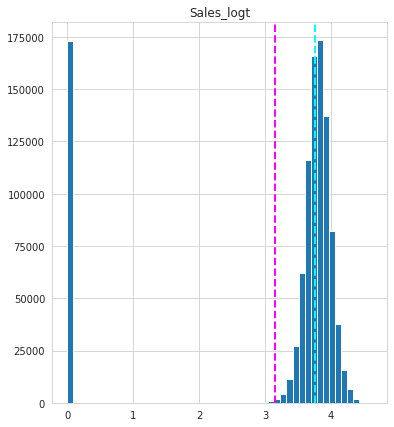

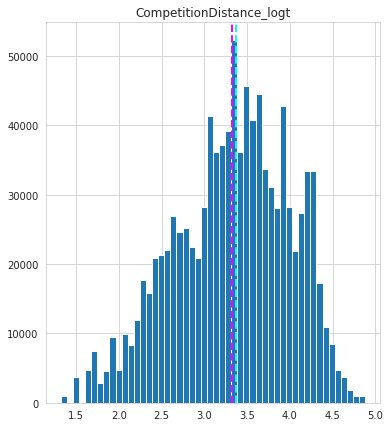

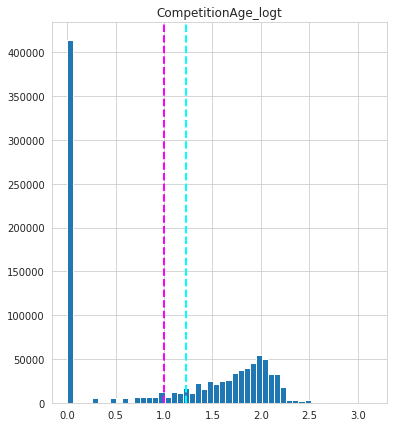

In [ ]:
# We need to remove multi-collinearity and normalise our data for linear regression to work properly
df1['Sales_logt'] = df1['Sales'].apply(lambda x: np.log10(x+1))
df1['CompetitionDistance_logt'] = df1['CompetitionDistance'].apply(lambda x: np.log10(x+1))
df1['CompetitionAge_logt'] = df1['CompetitionAge'].apply(lambda x: np.log10(x+1))

for col in ['Sales_logt','CompetitionDistance_logt','CompetitionAge_logt']:

  print(col, df1[col].skew())
  figure=plt.figure(figsize=(6,7))
  ax=figure.gca()
  feature = df1[col]
  feature.hist(bins=50, ax = ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
  ax.set_title(col)
plt.show()

Ignoring the zero values, the skewness has reduced considerably

#5 Model building

#5.1 Train-Test Split

In [ ]:
df1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Open', 'Promo', 'SchoolHoliday',
       'CompetitionDistance', 'Promo2', 'Year', 'Month', 'Day',
       'CompetitionAge', 'Promo2New', 'holy_0', 'holy_a', 'holy_b', 'holy_c',
       'type_a', 'type_b', 'type_c', 'type_d', 'assort_a', 'assort_b',
       'assort_c', 'MonthlyAvgCust', 'WeekdayAvgCust', 'DateAvgCust',
       'Sales_logt', 'CompetitionDistance_logt', 'CompetitionAge_logt'],
      dtype='object')

In [ ]:
# We will split data on time basis and keep last 6 weeks of data in the test set
# We use Date for spliting after which we can drop the feature 
last_date = df1['Date'].max()
date_before_six_weeks = last_date - datetime.timedelta(days=42)

# This should be the last date in out train set, so lets find the respective index

train_set_first_index = df1[df1['Date']==date_before_six_weeks].first_valid_index()

print('Last Date :' , last_date ,'\n'
      'Date Before Six Weeks :', date_before_six_weeks,'\n'
      'Train Set First Index :', train_set_first_index)

Last Date : 2015-07-31 00:00:00 
Date Before Six Weeks : 2015-06-19 00:00:00 
Train Set First Index : 46830


In [ ]:
# Lets split the data
train_df = df1[train_set_first_index :]
test_df = df1[: train_set_first_index]
print('Train df :', train_df.shape,'\n'
      'Test df :' , test_df.shape)

Train df : (970325, 31) 
Test df : (46830, 31)


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017155 entries, 0 to 1017208
Data columns (total 31 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   Store                     1017155 non-null  int64         
 1   DayOfWeek                 1017155 non-null  int64         
 2   Date                      1017155 non-null  datetime64[ns]
 3   Sales                     1017155 non-null  int64         
 4   Open                      1017155 non-null  int64         
 5   Promo                     1017155 non-null  int64         
 6   SchoolHoliday             1017155 non-null  int64         
 7   CompetitionDistance       1017155 non-null  float64       
 8   Promo2                    1017155 non-null  int64         
 9   Year                      1017155 non-null  int64         
 10  Month                     1017155 non-null  int64         
 11  Day                       1017155 non-null  int64 

In [ ]:
# Defining our variables for model
X_train = train_df.drop(columns=['Date','Sales','Sales_logt','CompetitionDistance', 'CompetitionAge'])
X_test = test_df.drop(columns=['Date','Sales','Sales_logt','CompetitionDistance', 'CompetitionAge'])
y_train = train_df['Sales_logt']
y_test = test_df['Sales_logt']

In [ ]:
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [ ]:
# Evaulation metrix 
# We need to inverse transform our DV for evaulting the model
def rmse(x, y):

    return sqrt(mean_squared_error(10**x-1, 10**y-1))

def R2_score(x,y):
  return r2_score(10**x-1,10**y-1)    

#5.2 Linear Regression

In [ ]:
lr_model= LinearRegression()
lr = lr_model.fit(X_train_std, y_train)

In [ ]:
lr.intercept_

3.151580553320584

In [ ]:
lr.coef_

array([-1.71803121e-04, -1.35640069e-02,  1.37782605e+00,  6.43380666e-02,
        1.82547850e-03, -1.72174882e-02,  1.04226544e-02,  3.57210148e-03,
       -1.41325051e-03, -2.53970431e-03, -4.79861181e+10, -3.89838579e+10,
       -2.25609704e+10, -1.76855878e+10, -4.44027622e+11, -1.10360950e+11,
       -3.04193541e+11, -4.11249607e+11,  1.23539442e+11,  2.22566757e+10,
        1.23408971e+11,  1.38063300e-02,  2.20431408e-02,  8.78352280e-03,
       -1.44153521e-02, -3.52131989e-03])

In [ ]:
y_train_pred_lr = lr.predict(X_train_std)
y_pred_lr = lr.predict(X_test_std)

In [ ]:
lr_y_train_rmse = rmse(y_train, y_train_pred_lr)
lr_y_test_rmse = rmse(y_test, y_pred_lr)
lr_y_train_r2_score = R2_score(y_train, y_train_pred_lr)
lr_y_test_r2_score = R2_score(y_test, y_pred_lr)

print("Training RMSE", ":", lr_y_train_rmse ,
      "Testing RMSE", ":",lr_y_test_rmse )
print("Training R2_Score", ":", lr_y_train_r2_score,
      "Testing R2_Score", ":",lr_y_test_r2_score)

Training RMSE : 2534.1445249982976 Testing RMSE : 2463.287112966455
Training R2_Score : 0.5679427770827489 Testing R2_Score : 0.5629605166197311


Text(0, 0.5, 'Predicted values')

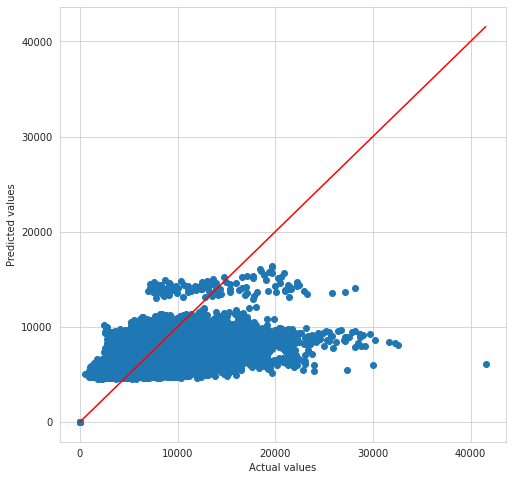

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(10**y_test-1,10**y_pred_lr-1)

p1 = max(max(10**y_pred_lr-1),max(10**y_test-1))
p2 = min(min(10**y_pred_lr-1),min(10**y_test-1))
plt.plot([p1,p2],[p1,p2],c='r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

In [ ]:
result_df = pd.DataFrame()
result_df['Test'] = 10**y_test-1
result_df['Pred_lr'] = 10**y_pred_lr-1
result_df.head()

,Test,Pred_lr
0,5263.0,7962.905538
1,6064.0,7300.610453
2,8314.0,6814.787704
3,13995.0,8908.424498
4,4822.0,7477.884781


In [ ]:
# Checking for zero sales 
result_df[result_df['Test']==0].head()

,Test,Pred_lr
291,0.0,0.749045
875,0.0,0.511768
1406,0.0,0.836455
1990,0.0,0.587320
2521,0.0,0.774735


#5.3 Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
# Keeping some restrictions to limit overfitting
dt_model = DecisionTreeRegressor(min_samples_leaf=20)
tree= dt_model.fit(X_train_std, y_train)

In [ ]:
y_train_pred_tree = tree.predict(X_train_std)
y_pred_tree = tree.predict(X_test_std)

In [ ]:
tree_y_train_rmse = rmse(y_train, y_train_pred_tree)
tree_y_test_rmse = rmse(y_test, y_pred_tree)
tree_y_train_r2_score = R2_score(y_train, y_train_pred_tree)
tree_y_test_r2_score = R2_score(y_test, y_pred_tree)

print("Training RMSE", ":", tree_y_train_rmse ,
      "Testing RMSE", ":",tree_y_test_rmse )
print("Training R2_Score", ":", tree_y_train_r2_score,
      "Testing R2_Score", ":",tree_y_test_r2_score)

Training RMSE : 977.504976772209 Testing RMSE : 1250.953208920695
Training R2_Score : 0.9357139909383695 Testing R2_Score : 0.8872873305575871


Text(0, 0.5, 'Predicted values')

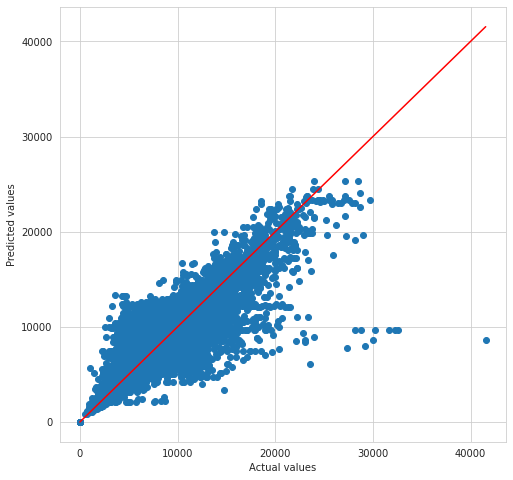

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(10**y_test-1,10**y_pred_tree-1)
p1 = max(max(10**y_pred_lr-1),max(10**y_test-1))
p2 = min(min(10**y_pred_lr-1),min(10**y_test-1))
plt.plot([p1,p2],[p1,p2],c='r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

In [ ]:
result_df['Pred_tree'] = 10**y_pred_tree-1
result_df.head()

,Test,Pred_lr,Pred_tree
0,5263.0,7962.905538,5574.222412
1,6064.0,7300.610453,5558.078654
2,8314.0,6814.787704,7787.092171
3,13995.0,8908.424498,10957.782435
4,4822.0,7477.884781,6810.214900


In [ ]:
# Checking for zero sales 
result_df[result_df['Test']==0].head()

,Test,Pred_lr,Pred_tree
291,0.0,0.749045,0.0
875,0.0,0.511768,0.0
1406,0.0,0.836455,0.0
1990,0.0,0.587320,0.0
2521,0.0,0.774735,0.0


In [ ]:
# Cross-validation
d_tree_model = DecisionTreeRegressor()
grid_values = {'min_samples_leaf':[3,5,7,10,15,20],'max_depth' : [30,35,40,45],'splitter':['best','random']}
d_tree = GridSearchCV(d_tree_model, param_grid = grid_values, scoring = 'neg_mean_squared_error', cv=5,verbose=3)

# Fit the object to train dataset

d_tree.fit(X_train_std, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END max_depth=30, min_samples_leaf=3, splitter=best;, score=-0.007 total time=   9.0s
[CV 2/5] END max_depth=30, min_samples_leaf=3, splitter=best;, score=-0.006 total time=   8.5s
[CV 3/5] END max_depth=30, min_samples_leaf=3, splitter=best;, score=-0.006 total time=   8.3s
[CV 4/5] END max_depth=30, min_samples_leaf=3, splitter=best;, score=-0.006 total time=   8.2s
[CV 5/5] END max_depth=30, min_samples_leaf=3, splitter=best;, score=-0.006 total time=   8.4s
[CV 1/5] END max_depth=30, min_samples_leaf=3, splitter=random;, score=-0.008 total time=   4.2s
[CV 2/5] END max_depth=30, min_samples_leaf=3, splitter=random;, score=-0.008 total time=   4.2s
[CV 3/5] END max_depth=30, min_samples_leaf=3, splitter=random;, score=-0.008 total time=   4.2s
[CV 4/5] END max_depth=30, min_samples_leaf=3, splitter=random;, score=-0.010 total time=   4.1s
[CV 5/5] END max_depth=30, min_samples_leaf=3, splitter=random;, score=-0.0

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [30, 35, 40, 45],
                         'min_samples_leaf': [3, 5, 7, 10, 15, 20],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
print("The best fit alpha value is found out to be :" ,d_tree.best_params_)
print("\nUsing ",d_tree.best_params_, ", squared_error is: ", d_tree.best_score_)

The best fit alpha value is found out to be : {'max_depth': 35, 'min_samples_leaf': 10, 'splitter': 'best'}

Using  {'max_depth': 35, 'min_samples_leaf': 10, 'splitter': 'best'} , squared_error is:  -0.005910846806949816


In [ ]:
y_train_pred_d_tree = d_tree.predict(X_train_std)
y_pred_d_tree= d_tree.predict(X_test_std)

In [ ]:
d_tree_y_train_rmse = rmse(y_train, y_train_pred_d_tree)
d_tree_y_test_rmse = rmse(y_test, y_pred_d_tree)
d_tree_y_train_r2_score = R2_score(y_train, y_train_pred_d_tree)
d_tree_y_test_r2_score = R2_score(y_test, y_pred_d_tree)

print("Training RMSE", ":", d_tree_y_train_rmse ,
      "Testing RMSE", ":",d_tree_y_test_rmse )
print("Training R2_Score", ":", d_tree_y_train_r2_score,
      "Testing R2_Score", ":", d_tree_y_test_r2_score)

Training RMSE : 853.019408445231 Testing RMSE : 1236.198446095334
Training R2_Score : 0.9510450810335062 Testing R2_Score : 0.8899305006083527


Text(0, 0.5, 'Predicted values')

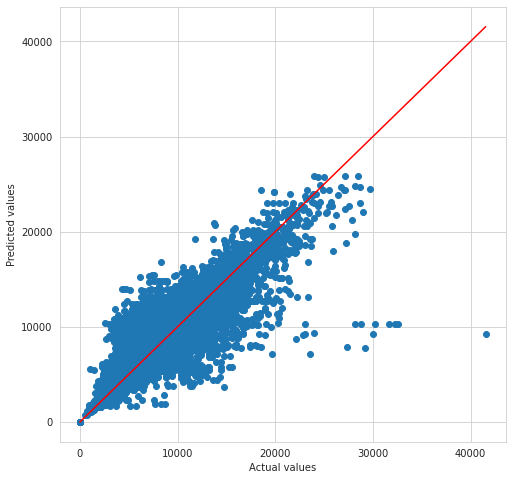

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(10**y_test-1,10**y_pred_d_tree-1)
p1 = max(max(10**y_pred_d_tree-1),max(10**y_test-1))
p2 = min(min(10**y_pred_d_tree-1),min(10**y_test-1))
plt.plot([p1,p2],[p1,p2],c='r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

In [ ]:
result_df['Pred_tree_bestfit'] = 10**y_pred_d_tree-1
result_df.head()

,Test,Pred_lr,Pred_tree,Pred_tree_bestfit
0,5263.0,7962.905538,5574.222412,5694.169194
1,6064.0,7300.610453,5558.078654,5993.949684
2,8314.0,6814.787704,7787.092171,8899.828986
3,13995.0,8908.424498,10957.782435,10286.774209
4,4822.0,7477.884781,6810.214900,6622.718062


In [ ]:
# Lets check if zero sales is predicted correctly
print(result_df[result_df['Test']==0].shape[0])
print(result_df[result_df['Pred_tree_bestfit']==0].shape[0])
result_df[result_df['Test']==0].head()

6548
6548


,Test,Pred_lr,Pred_tree,Pred_tree_bestfit
291,0.0,0.749045,0.0,0.0
875,0.0,0.511768,0.0,0.0
1406,0.0,0.836455,0.0,0.0
1990,0.0,0.587320,0.0,0.0
2521,0.0,0.774735,0.0,0.0


#5.4 Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RFR_model = RandomForestRegressor(n_estimators=20,min_samples_leaf=5)

In [ ]:
rf= RFR_model.fit(X_train_std, y_train)

In [ ]:
y_train_pred_rf = rf.predict(X_train_std)
y_pred_rf = rf.predict(X_test_std)

In [ ]:
rf_y_train_rmse = rmse(y_train, y_train_pred_rf)
rf_y_test_rmse = rmse(y_test, y_pred_rf)
rf_y_train_r2_score = R2_score(y_train, y_train_pred_rf)
rf_y_test_r2_score = R2_score(y_test, y_pred_rf)

print("Training RMSE", ":", rf_y_train_rmse ,
      "Testing RMSE", ":",rf_y_test_rmse )
print("Training R2_Score", ":", rf_y_train_r2_score,
      "Testing R2_Score", ":",rf_y_test_r2_score)

Training RMSE : 706.1241313156661 Testing RMSE : 1052.6637282275597
Training R2_Score : 0.9664540096496835 Testing R2_Score : 0.9201876824404993


Text(0, 0.5, 'Predicted values')

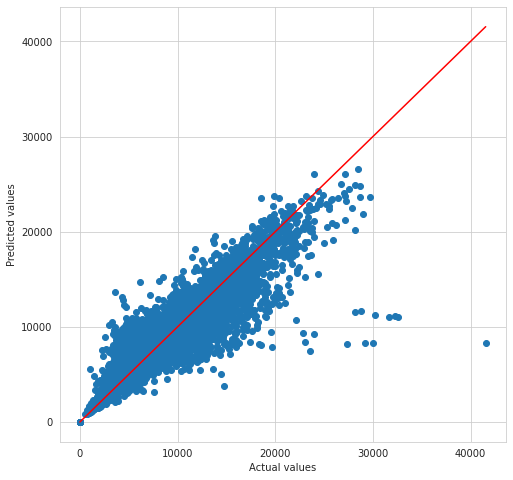

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(10**y_test-1,10**y_pred_rf-1)
p1 = max(max(10**y_pred_lr-1),max(10**y_test-1))
p2 = min(min(10**y_pred_lr-1),min(10**y_test-1))
plt.plot([p1,p2],[p1,p2],c='r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

In [ ]:
result_df['Pred_rf'] = 10**y_pred_rf-1
result_df.head()

,Test,Pred_lr,Pred_tree,Pred_tree_bestfit,Pred_rf
0,5263.0,7962.905538,5574.222412,5694.169194,5660.118047
1,6064.0,7300.610453,5558.078654,5993.949684,6808.767539
2,8314.0,6814.787704,7787.092171,8899.828986,8615.157780
3,13995.0,8908.424498,10957.782435,10286.774209,11483.261552
4,4822.0,7477.884781,6810.214900,6622.718062,6416.125756


In [ ]:
# Imp features
features = X_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

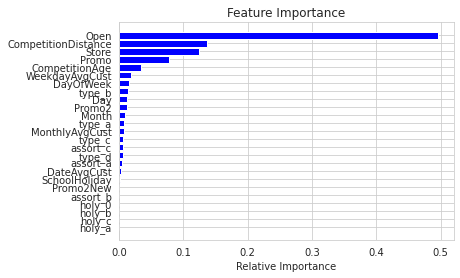

In [ ]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

In [ ]:
# Cross-validation
rf_model = RandomForestRegressor()
grid_values = {'max_depth':[30,35,40],'n_estimators':[20,30,40],'min_samples_leaf':[3,4,5]}
rfr = GridSearchCV(rf_model, param_grid = grid_values, scoring = 'neg_mean_squared_error', cv=5,verbose=3,n_jobs=-1)

# Fit the object to train dataset

rfr.fit(X_train_std, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [30, 35, 40],
                         'min_samples_leaf': [3, 4, 5],
                         'n_estimators': [20, 30, 40]},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
print("The best fit alpha value is found out to be :" ,rfr.best_params_)
print("\nUsing ",rfr.best_params_, " neg_mean_squared_error is: ", rfr.best_score_)

The best fit alpha value is found out to be : {'max_depth': 35, 'min_samples_leaf': 3, 'n_estimators': 30}

Using  {'max_depth': 35, 'min_samples_leaf': 3, 'n_estimators': 30}  neg_mean_squared_error is:  -0.003990971695015283


In [ ]:
y_train_pred_rfr = rfr.predict(X_train_std)
y_pred_rfr = rfr.predict(X_test_std)

In [ ]:
rfr_y_train_rmse = rmse(y_train, y_train_pred_rfr)
rfr_y_test_rmse = rmse(y_test, y_pred_rfr)
rfr_y_train_r2_score = R2_score(y_train, y_train_pred_rfr)
rfr_y_test_r2_score = R2_score(y_test, y_pred_rfr)

print("Training RMSE", ":", rfr_y_train_rmse ,
      "Testing RMSE", ":",rfr_y_test_rmse )
print("Training R2_Score", ":", rfr_y_train_r2_score,
      "Testing R2_Score", ":", rfr_y_test_r2_score)

Training RMSE : 582.2882737896356 Testing RMSE : 1006.9253941547572
Training R2_Score : 0.9771884603130974 Testing R2_Score : 0.9269727087541191


Text(0, 0.5, 'Predicted values')

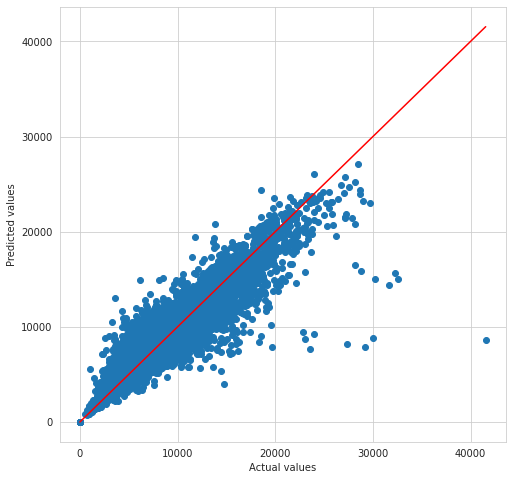

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(10**y_test-1,10**y_pred_rfr-1)
p1 = max(max(10**y_pred_rfr-1),max(10**y_test-1))
p2 = min(min(10**y_pred_rfr-1),min(10**y_test-1))
plt.plot([p1,p2],[p1,p2],c='r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

In [ ]:
result_df['Pred_rf_bestfit'] = 10**y_pred_rfr-1
result_df.head()

,Test,Pred_lr,Pred_tree,Pred_tree_bestfit,Pred_rf,Pred_rf_bestfit
0,5263.0,7962.905538,5574.222412,5694.169194,5660.118047,5621.974415
1,6064.0,7300.610453,5558.078654,5993.949684,6808.767539,6670.592286
2,8314.0,6814.787704,7787.092171,8899.828986,8615.157780,9459.082937
3,13995.0,8908.424498,10957.782435,10286.774209,11483.261552,12450.467317
4,4822.0,7477.884781,6810.214900,6622.718062,6416.125756,6596.755370


In [ ]:
# Checking for zero sales 
result_df[result_df['Test']==0].head()

,Test,Pred_lr,Pred_tree,Pred_tree_bestfit,Pred_rf,Pred_rf_bestfit
291,0.0,0.749045,0.0,0.0,0.0,0.0
875,0.0,0.511768,0.0,0.0,0.0,0.0
1406,0.0,0.836455,0.0,0.0,0.0,0.0
1990,0.0,0.587320,0.0,0.0,0.0,0.0
2521,0.0,0.774735,0.0,0.0,0.0,0.0
